In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # 모든 열을 출력한다.

# 기본 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns
from matplotlib import rc

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random
import warnings
warnings.filterwarnings("ignore")

train_df = pd.read_csv('/content/drive/MyDrive/미래매출/sales_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/미래매출/test.csv')
sample_submission_df = pd.read_csv('/content/drive/MyDrive/미래매출/sample_submission.csv')

print(train_df.shape)
print(test_df.shape)

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
(2935849, 6)
(214200, 3)


In [ ]:
items = pd.read_csv('/content/drive/MyDrive/미래매출/items.csv')
item_categories = pd.read_csv('/content/drive/MyDrive/미래매출/item_categories.csv')
shops = pd.read_csv('/content/drive/MyDrive/미래매출/shops.csv')
items_en = pd.read_csv('/content/drive/MyDrive/미래매출 번역/items_en.csv')
item_categories_en = pd.read_csv('/content/drive/MyDrive/미래매출 번역/item_categories_en.csv')
shops_en = pd.read_csv('/content/drive/MyDrive/미래매출 번역/shops_en.csv')

- ID - 테스트 세트 내의 (Shop, Item) 튜플을 나타내는 ID
- **shop_id - 상점의 고유 식별자**
- **item_id - 제품의 고유 식별자**
-item_category_id - 항목 범주의 고유 식별자
-**item_cnt_day - 판매된 제품 수입니다. 이 측정값의 월별 금액을 예측하고 있습니다**
-**item_price - 아이템의 현재 가격**
-**date - dd/mm/yyyy 형식의 날짜**
-**date_block_num - 편의상 사용되는 연속된 월 번호입니다. 2013년 1월은 0, 2013년 2월은 1,..., 2015년 10월은 33입니다.**
-item_name - 항목 이름
-shop_name - 상점 이름
-item_category_name - 항목 범주의 이름

In [ ]:
train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [ ]:
test_df

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
sample_submission_df

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
items_en

,item_name,item_id,item_category_id
0,! POWER IN glamor (PLAST.) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** In the glory (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40
...,...,...,...
22165,"Nuclear titbit 2 [PC, Digital Version]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
item_categories_en

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
...,...,...
79,System Tools,79
80,Utilities - Tickets,80
81,Net carriers (spire),81
82,Net carriers (piece),82


In [ ]:
shops_en

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""Central"" Franc",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TRC ""October-Kinomir""",3
4,"Volzhsky mall ""Volga Mall""",4
5,"Vologda SEC ""Marmalade""",5
6,"Voronezh (Plekhanovskaya, 13)",6
7,"Voronezh TRC ""Maksimir""",7
8,"Voronezh TRC City-Park ""City""",8
9,Itinerant trade,9


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [ ]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


# **결측치**

In [ ]:
train_df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
test_df.isna().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [ ]:
items.isna().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [ ]:
item_categories.isna().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [ ]:
shops.isna().sum()

shop_name    0
shop_id      0
dtype: int64

# **EDA**

## **숫자형**

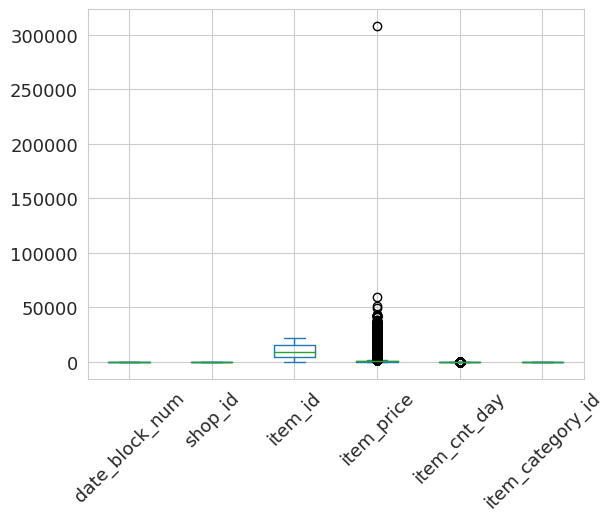

In [ ]:
# 회전된 텍스트 레이블로 상자 그림 그리기
train_df.plot(kind='box', rot=45)

# 그림 표시
plt.show()

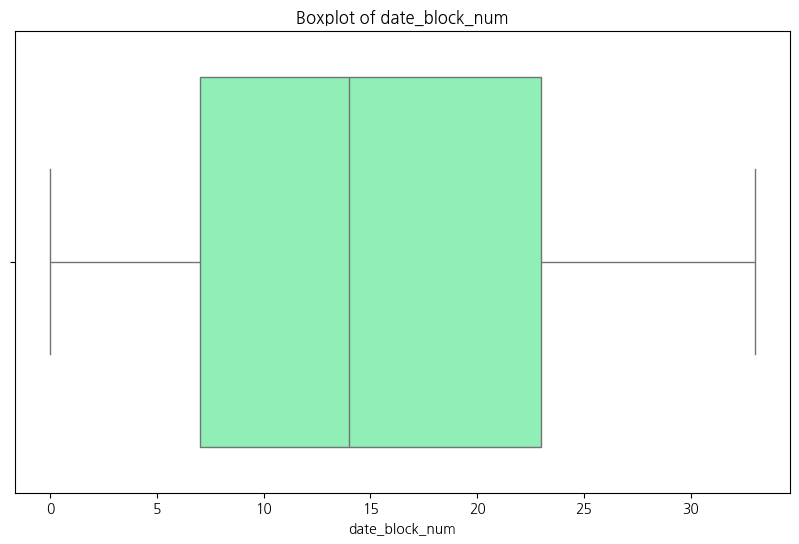

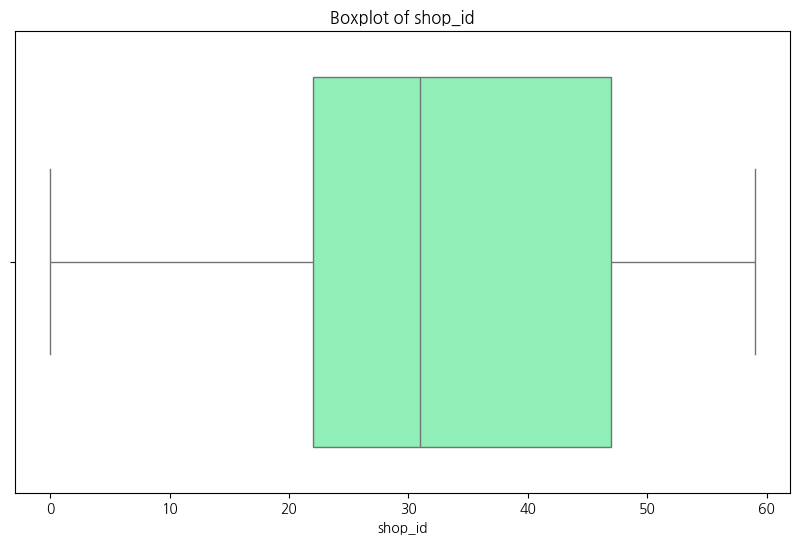

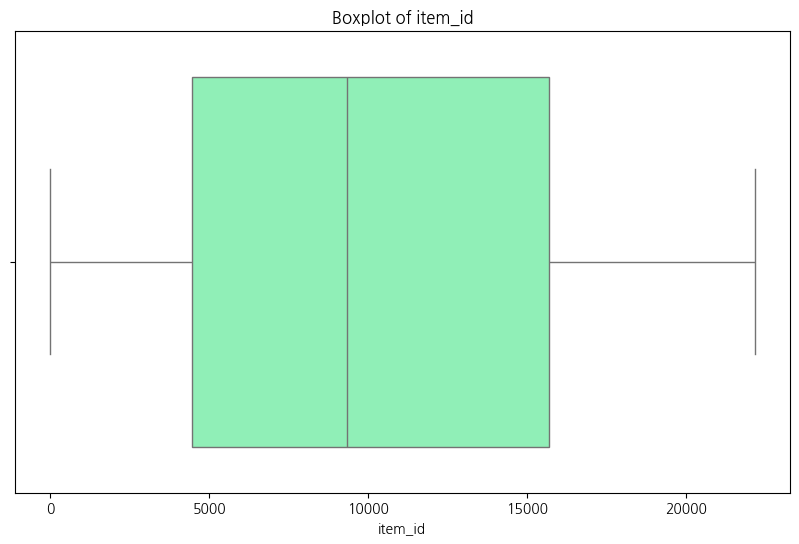

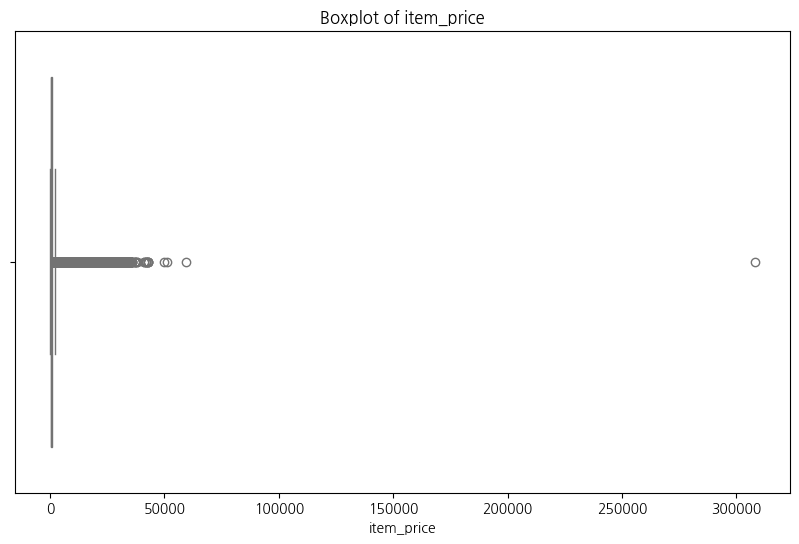

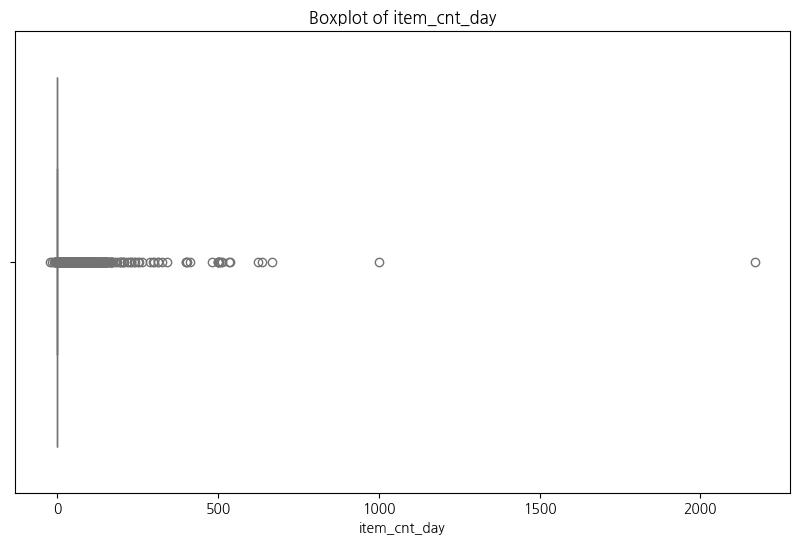

In [ ]:
# 숫자 열 선택
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# 이상치 식별하기 위해 숫자 형상에 대한 상자 그림 표시
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

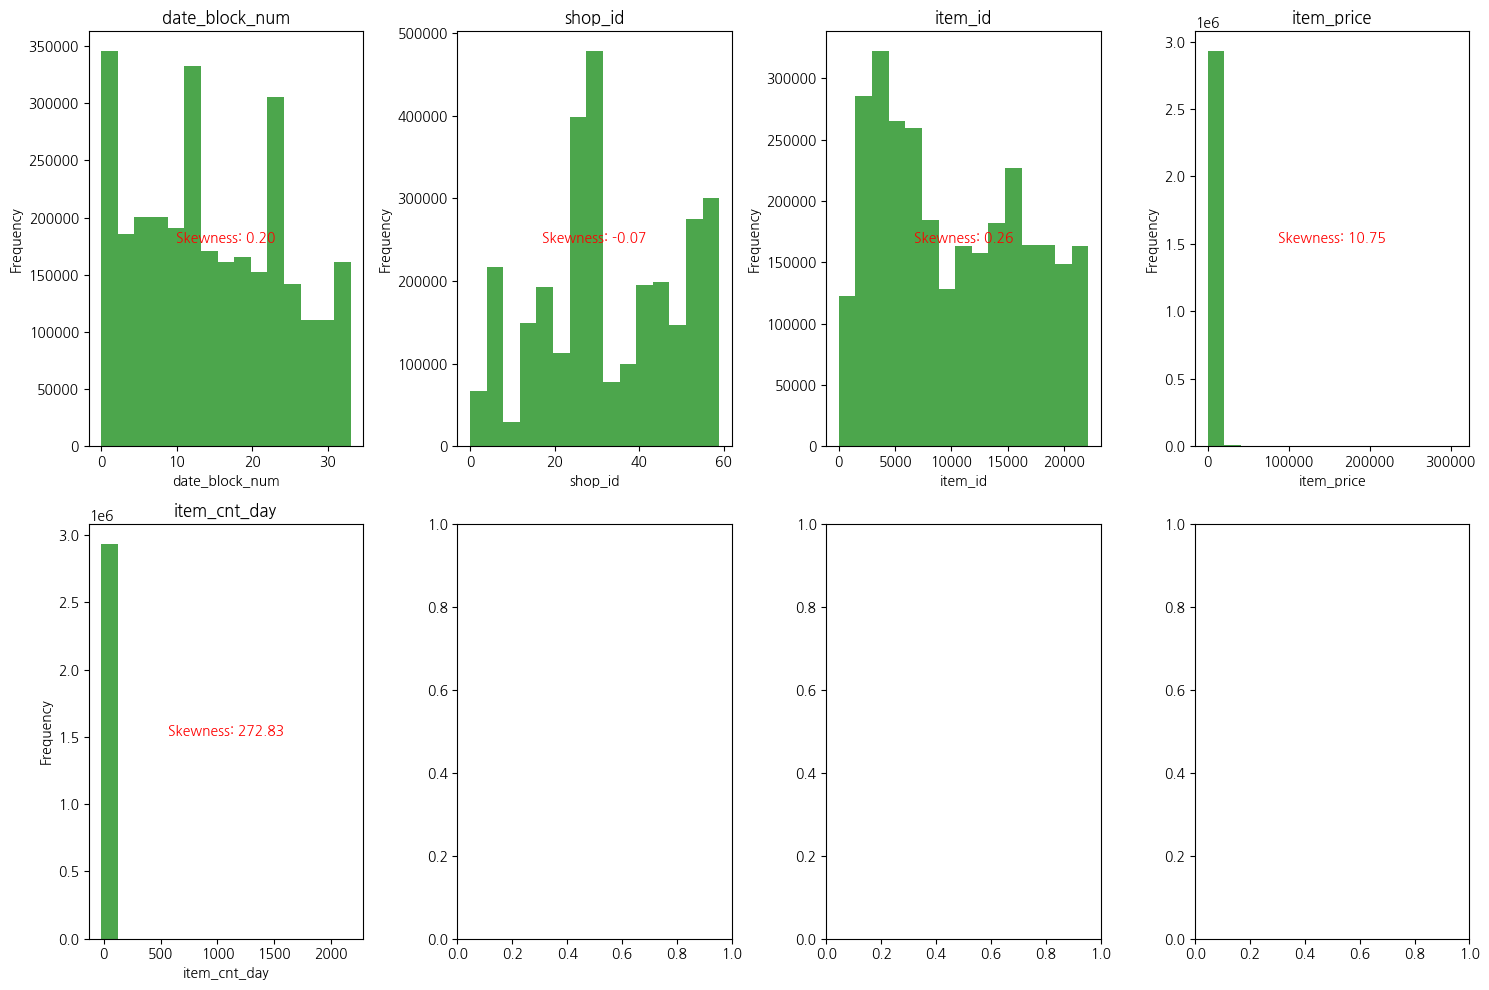

Skewness:
date_block_num      0.203858
shop_id            -0.072361
item_id             0.257174
item_price         10.750423
item_cnt_day      272.833162
dtype: float64


In [ ]:
# 숫자 열에 대한 왜도 계산
skewness = train_df.select_dtypes(include=['int64', 'float64']).skew()

# 숫자열의 개수
num_cols_count = len(train_df.select_dtypes(include=['int64', 'float64']).columns)

# 부분도의 레이아웃 결정
num_rows = (num_cols_count + 3) // 4  # 각 행의 열 수 조정
num_cols = min(4, num_cols_count)  # 각 행에 최대 4개의 열

# 분포 시각화, 이상 징후 식별하기 위해 숫자 열에 대한 히스토그램 표시
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = train_df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(train_df[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')

            # 왜도 계산
            skew_val = skewness[col]

            # 그림 중앙에 왜도 값 표시
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# 왜도 값 인쇄
print("Skewness:")
print(skewness)

Text(0.5, 1.0, 'Correlation Matrix')

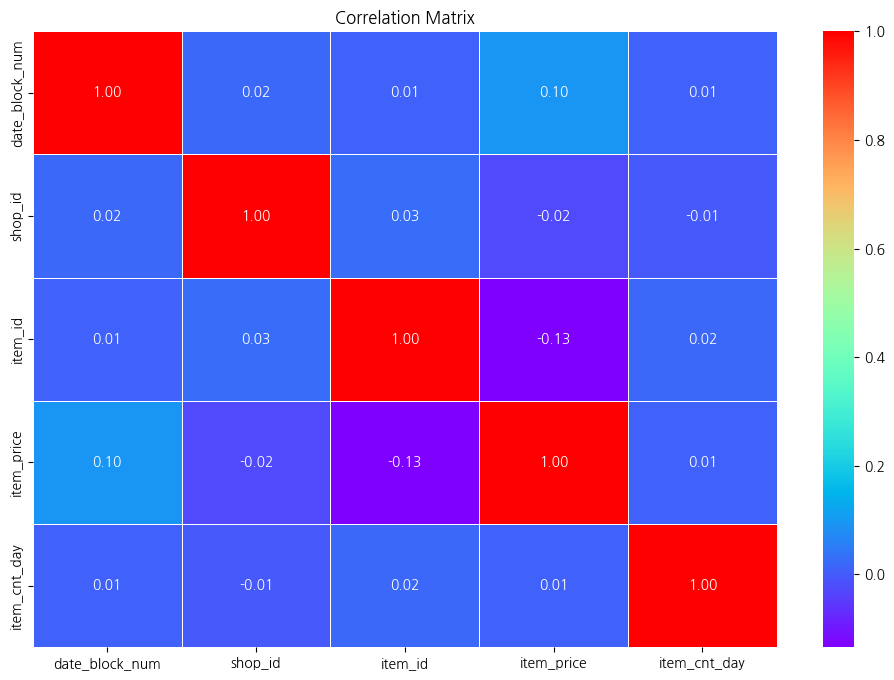

In [ ]:
# 상관계수행렬

# 데이터프레임에서 숫자 열만 선택
numeric_columns = train_df.select_dtypes(include=['number'])

# 상관 행렬 계산
correlation_matrix = numeric_columns.corr()

# 상관관계를 시각화하기 위한 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

## **범주형**

In [ ]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train_df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


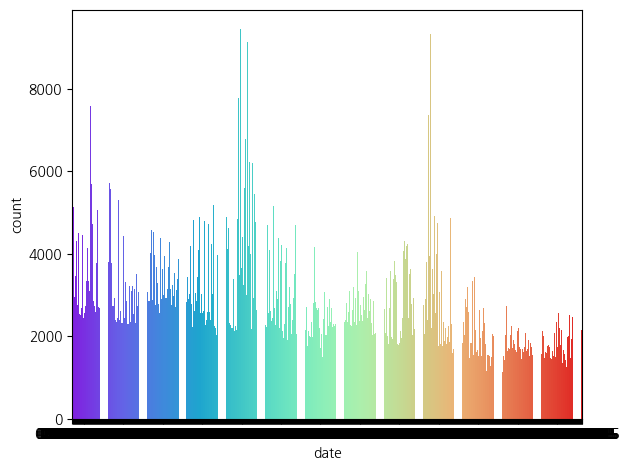

In [ ]:
# 범주형 선택
for column in train_df.select_dtypes(include=['object']):
    sns.countplot(x=column, data=train_df,palette='rainbow')
    plt.tight_layout()
    plt.show()

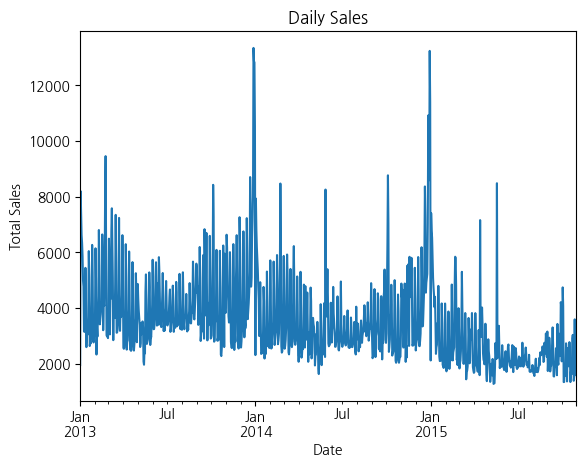

In [ ]:
# 2013 ~ 2015년
# 날짜 선택
start_date = "2013-01-01"
end_date =  "2015-12-31"
# 'date'열을 'datetime'스타일로 변환
train_df['date_formated'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

# 일 간격 데이터 선택
filtered_df = train_df[(train_df['date_formated'] >= start_date) & (train_df['date_formated'] <= end_date)]

# 데이터 일 단위로 그룹화. 하루 총 판매량 계산
daily_train_df = filtered_df.groupby('date_formated')['item_cnt_day'].sum()

# 시간에 따른 데이터 시각화
daily_train_df.plot(kind='line')

# 제목, 레이블 지정
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

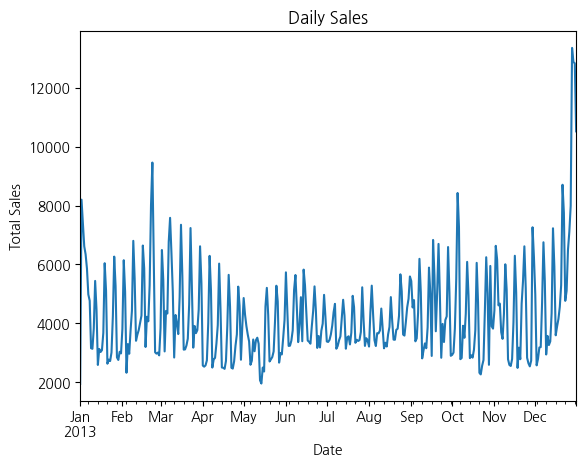

In [ ]:
# 2013년
# 날짜 선택
start_date = "2013-01-01"
end_date =  "2013-12-31"
# 'date'열을 'datetime'스타일로 변환
train_df['date_formated'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

# 일 간격 데이터 선택
filtered_df_1 = train_df[(train_df['date_formated'] >= start_date) & (train_df['date_formated'] <= end_date)]

# 데이터 일 단위로 그룹화. 하루 총 판매량 계산
daily_train_df_1 = filtered_df_1.groupby('date_formated')['item_cnt_day'].sum()

# 시간에 따른 데이터 시각화
daily_train_df_1.plot(kind='line')

# 제목, 레이블 지정
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

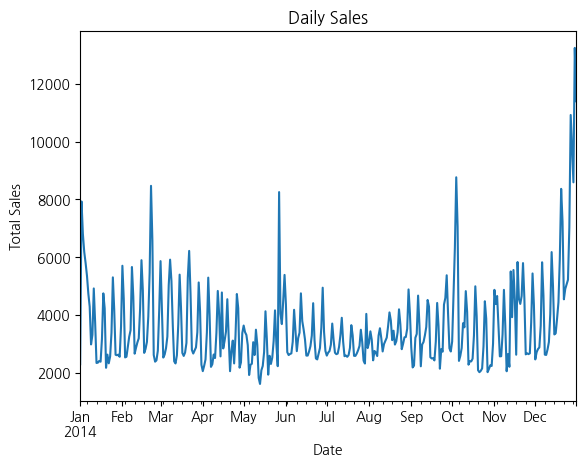

In [ ]:
# 2014년
# 날짜 선택
start_date = "2014-01-01"
end_date =  "2014-12-31"
# 'date'열을 'datetime'스타일로 변환
train_df['date_formated'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

# 일 간격 데이터 선택
filtered_df_2 = train_df[(train_df['date_formated'] >= start_date) & (train_df['date_formated'] <= end_date)]

# 데이터 일 단위로 그룹화. 하루 총 판매량 계산
daily_train_df_2 = filtered_df_2.groupby('date_formated')['item_cnt_day'].sum()

# 시간에 따른 데이터 시각화
daily_train_df_2.plot(kind='line')

# 제목, 레이블 지정
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

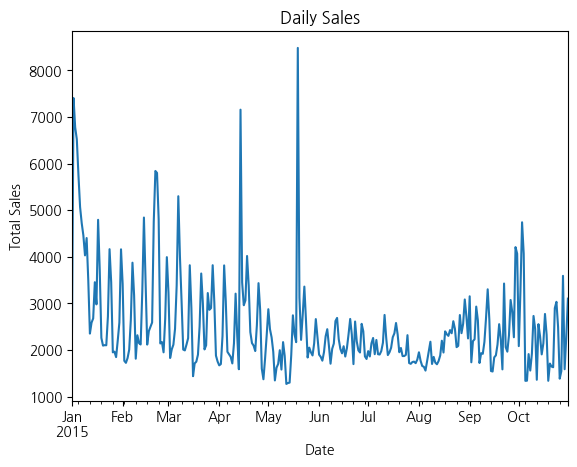

In [ ]:
# 2015년
# 날짜 선택
start_date = "2015-01-01"
end_date =  "2015-12-31"
# 'date'열을 'datetime'스타일로 변환
train_df['date_formated'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

# 일 간격 데이터 선택
filtered_df_3 = train_df[(train_df['date_formated'] >= start_date) & (train_df['date_formated'] <= end_date)]

# 데이터 일 단위로 그룹화. 하루 총 판매량 계산
daily_train_df_3 = filtered_df_3.groupby('date_formated')['item_cnt_day'].sum()

# 시간에 따른 데이터 시각화
daily_train_df_3.plot(kind='line')

# 제목, 레이블 지정
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

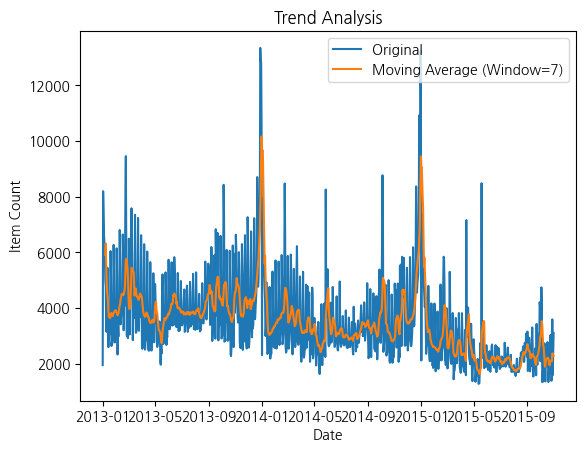

In [ ]:
# 제품 판매량 7일 이동평균 (일련의 데이터 포인트를 사용하여 데이터의 트렌드를 부드럽게 표시하는 방법)
daily_sales = filtered_df.groupby('date_formated')['item_cnt_day'].sum().to_frame(name='total_item_cnt_day')

# 7일 이동 평균 계산
rolling_avg = daily_sales.rolling(window=7).mean()


# 원본 및 이동 평균 데이터 시각화
plt.plot(daily_sales.index, daily_sales['total_item_cnt_day'], label='Original')
plt.plot(daily_sales.index, rolling_avg, label='Moving Average (Window=7)')

# 그래프 제목 및 축 레이블 지정
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Item Count')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


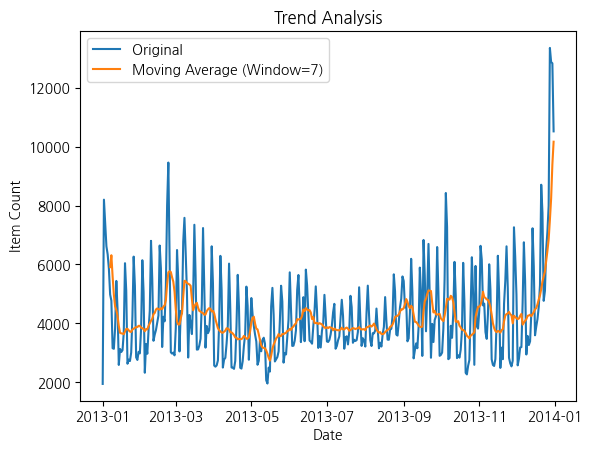

In [ ]:
# 제품 판매량 7일 이동평균 (일련의 데이터 포인트를 사용하여 데이터의 트렌드를 부드럽게 표시하는 방법)
daily_sales_1 = filtered_df_1.groupby('date_formated')['item_cnt_day'].sum().to_frame(name='total_item_cnt_day')

# 7일 이동 평균 계산
rolling_avg_1 = daily_sales_1.rolling(window=7).mean()


# 원본 및 이동 평균 데이터 시각화
plt.plot(daily_sales_1.index, daily_sales_1['total_item_cnt_day'], label='Original')
plt.plot(daily_sales_1.index, rolling_avg_1, label='Moving Average (Window=7)')

# 그래프 제목 및 축 레이블 지정
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Item Count')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

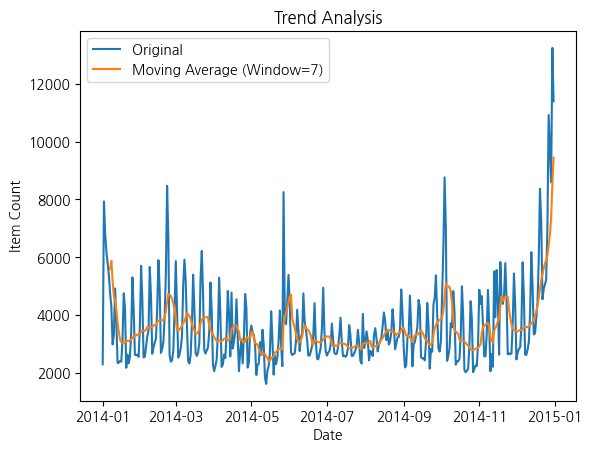

In [ ]:
# 제품 판매량 7일 이동평균 (일련의 데이터 포인트를 사용하여 데이터의 트렌드를 부드럽게 표시하는 방법)
daily_sales_2 = filtered_df_2.groupby('date_formated')['item_cnt_day'].sum().to_frame(name='total_item_cnt_day')

# 7일 이동 평균 계산
rolling_avg_2 = daily_sales_2.rolling(window=7).mean()


# 원본 및 이동 평균 데이터 시각화
plt.plot(daily_sales_2.index, daily_sales_2['total_item_cnt_day'], label='Original')
plt.plot(daily_sales_2.index, rolling_avg_2, label='Moving Average (Window=7)')

# 그래프 제목 및 축 레이블 지정
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Item Count')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

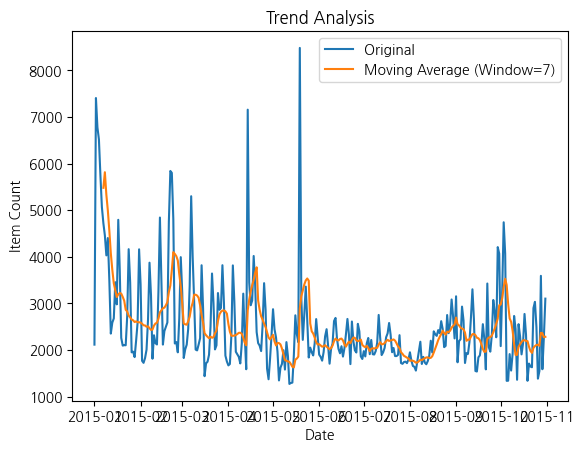

In [ ]:
# 제품 판매량 7일 이동평균 (일련의 데이터 포인트를 사용하여 데이터의 트렌드를 부드럽게 표시하는 방법)
daily_sales_3 = filtered_df_3.groupby('date_formated')['item_cnt_day'].sum().to_frame(name='total_item_cnt_day')

# 7일 이동 평균 계산
rolling_avg_3 = daily_sales_3.rolling(window=7).mean()


# 원본 및 이동 평균 데이터 시각화
plt.plot(daily_sales_3.index, daily_sales_3['total_item_cnt_day'], label='Original')
plt.plot(daily_sales_3.index, rolling_avg_3, label='Moving Average (Window=7)')

# 그래프 제목 및 축 레이블 지정
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Item Count')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

## **월별 판매량**

date_block_num 피처 기준 그룹화

In [ ]:
# 피처 요약표 만들기
def resumetable(df):
    print(f'데이터셋 형상:{df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values

    return summary

resumetable(train_df)

데이터셋 형상:(2935849, 6)


,피처,데이터타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0


In [ ]:
#그룹화
#date_block_num 피처를 기준으로 그룹화하기 -> 월별 판매량
group = train_df.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

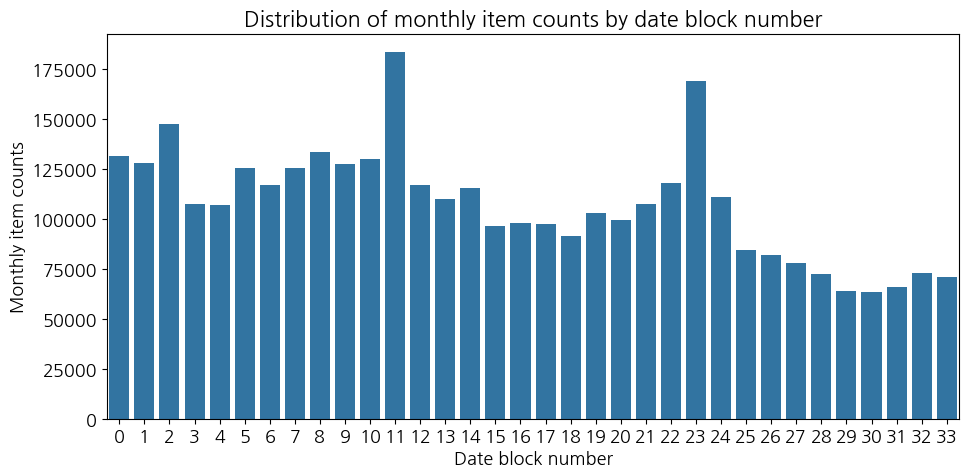

In [ ]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

#월별 총 상품 판매량
group_month_sum = train_df.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

#그래프 그리기
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum)

#그래프 제목, x축 라벨, y축 라벨
ax.set(title='Distribution of monthly item counts by date block number',
      xlabel='Date block number',
      ylabel='Monthly item counts')

How many products are outdated (no sales for the last 6 months): 12391


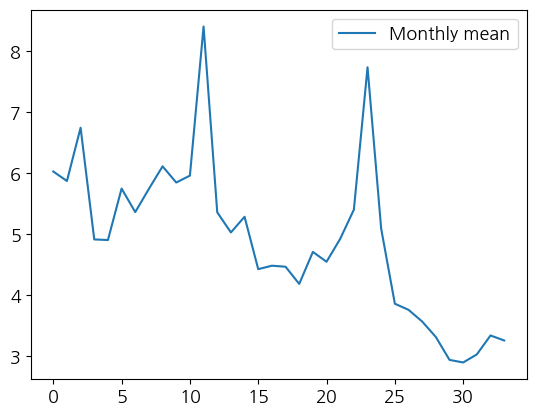

In [ ]:
sales_by_item_id = train_df.pivot_table(index=['item_id'],values=['item_cnt_day'],
                                        columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_item_id.columns = sales_by_item_id.columns.droplevel().map(str)
sales_by_item_id = sales_by_item_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_item_id.columns.values[0] = 'item_id'
sales_by_item_id.mean()[1:].plot(legend=True, label="Monthly mean")
outdated_items = sales_by_item_id[sales_by_item_id.loc[:,'27':].sum(axis=1)==0]
print('How many products are outdated (no sales for the last 6 months):', len(outdated_items))

In [ ]:
train_2=train_df.copy()

In [ ]:
#datetime을 object에서 datetime 타입으로 변환
train_2['date'] = pd.to_datetime(train_2['date'], format="%d.%m.%Y")
train_2['year'] = train_2['date'].dt.year
train_2['month'] = train_2['date'].dt.month
train_2['day'] = train_2['date'].dt.day

In [ ]:
group_2 = train_2.groupby(['year', 'month']).agg({'item_cnt_day': 'sum'}).reset_index()
group_2

,year,month,item_cnt_day
0,2013,1,131479.0
1,2013,2,128090.0
2,2013,3,147142.0
3,2013,4,107190.0
4,2013,5,106970.0
5,2013,6,125381.0
6,2013,7,116966.0
7,2013,8,125291.0
8,2013,9,133332.0
9,2013,10,127541.0


Text(0, 0.5, 'Sales Amount')

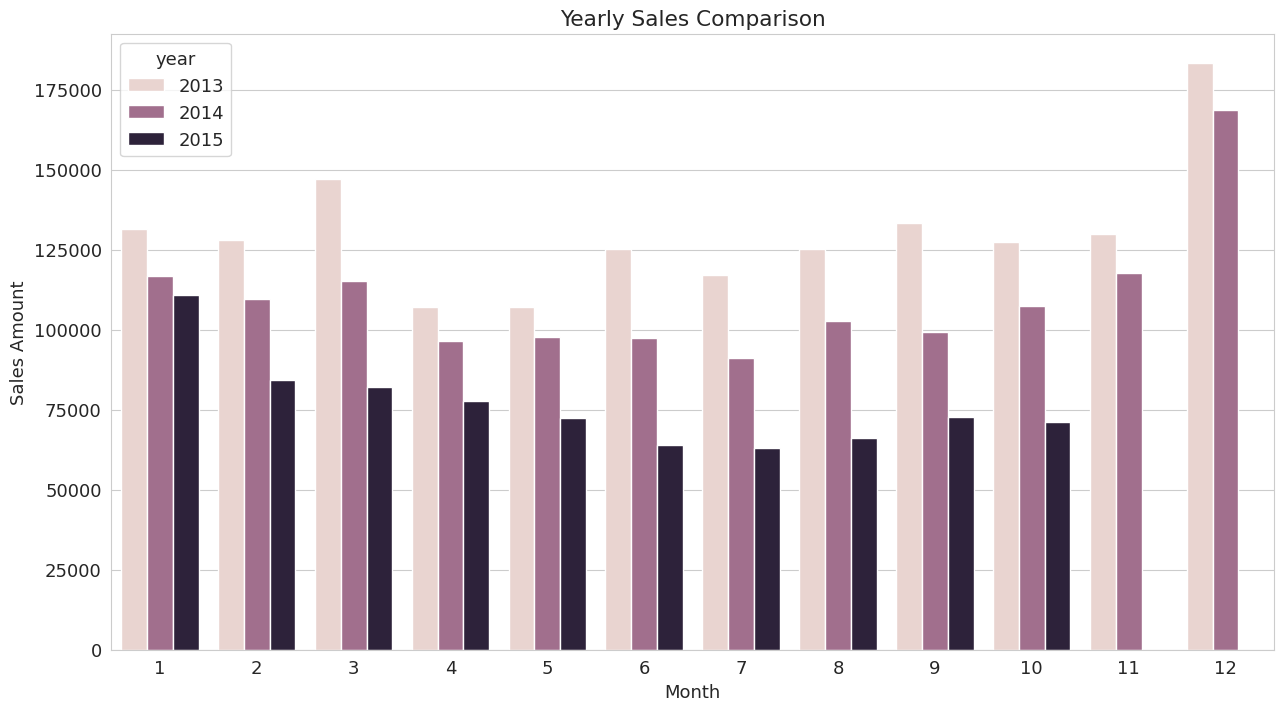

In [ ]:
sns.set_style('whitegrid')

plt.figure(figsize=(15,8))
ax = sns.barplot(x='month', y='item_cnt_day', hue='year', data=group_2)
plt.title("Yearly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Sales Amount")

## **상품분류별 판매**

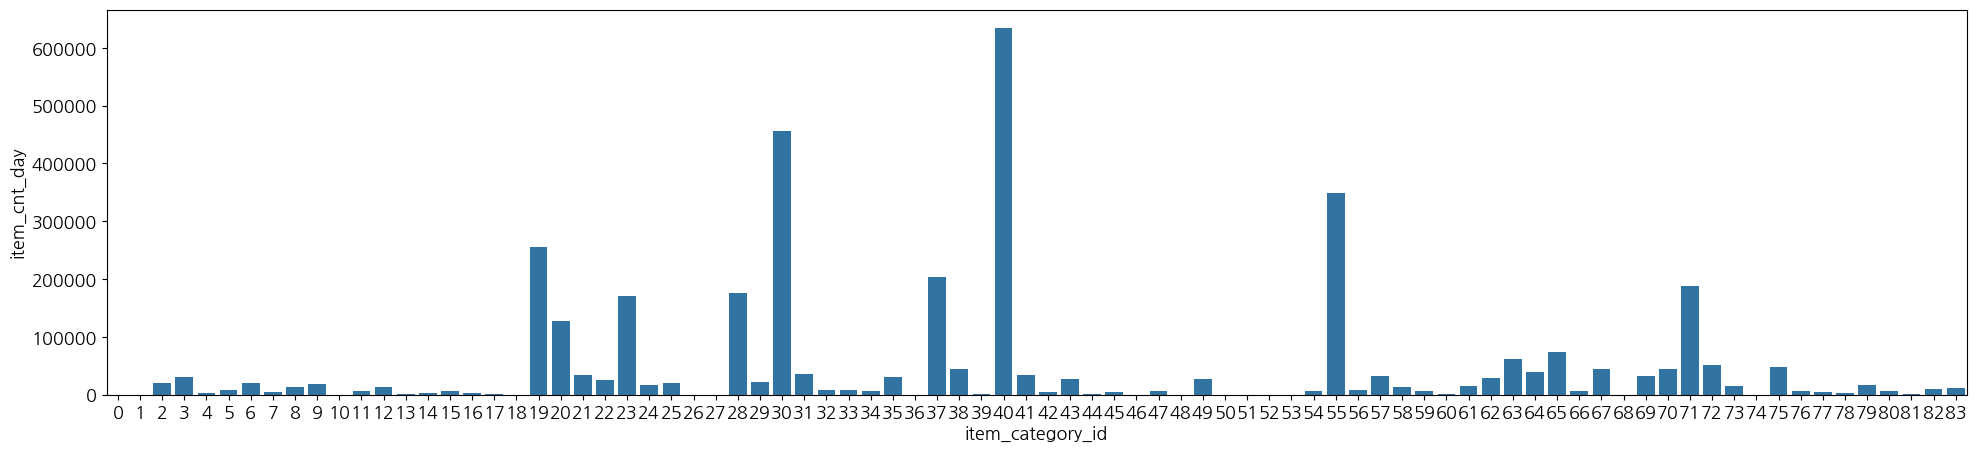

In [ ]:
figure, zs = plt.subplots()
figure.set_size_inches(24, 5)

#상품분류별 총 상품 판매량
group_cat_sum = train_df.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
      xlabel='Date block number',
      ylabel='Total item counts')

ax.tick_params(axis='x', labelrotation=90) #x축 라벨 회전

## **상점별 판매량**

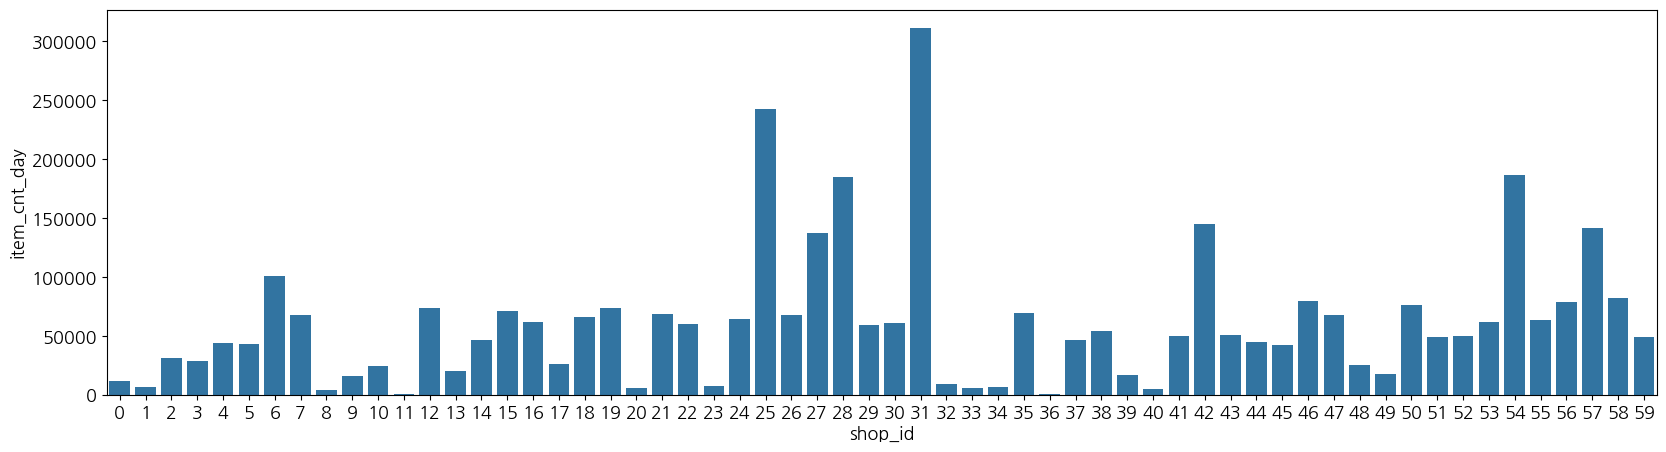

In [ ]:
figure, zs = plt.subplots()
figure.set_size_inches(20, 5)

#상품분류별 총 상품 판매량
group_cat_sum = train_df.groupby('shop_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

sns.barplot(x='shop_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of total item counts by shop id',
      xlabel='Date block number',
      ylabel='Total item counts')

ax.tick_params(axis='x', labelrotation=90) #x축 라벨 회전

# **이상치**

In [ ]:
train_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.57,9.42,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.00,16.23,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.23,6324.30,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.85,1729.80,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.24,2.62,-22.0,1.0,1.0,1.0,2169.0


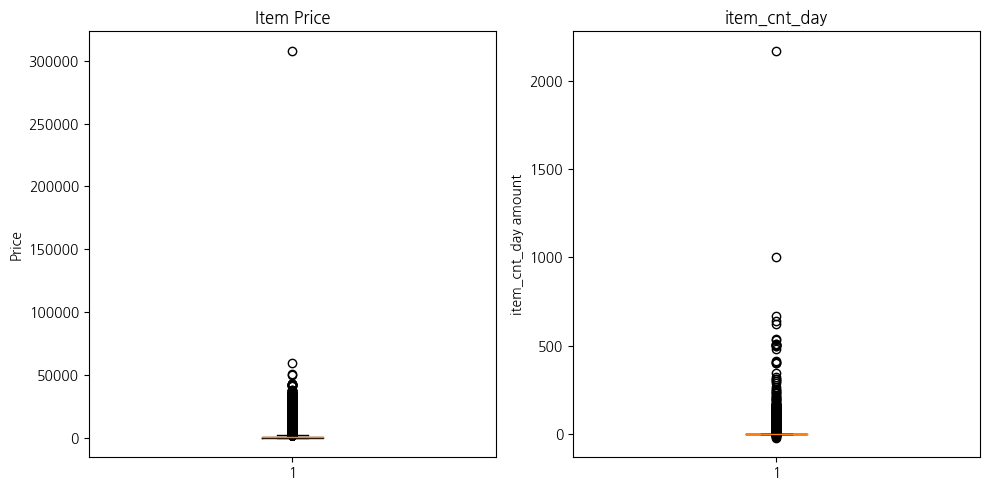

In [ ]:
# Figure와 Axes 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 'item_price'에 대한 상자 그림 플로팅
axes[0].boxplot(train_df['item_price'])
axes[0].set_title('Item Price')
axes[0].set_ylabel('Price')

# 'item_cnt_day'에 대한 상자 그림 플로팅
axes[1].boxplot(train_df['item_cnt_day'])
axes[1].set_title('item_cnt_day')
axes[1].set_ylabel('item_cnt_day amount')

# 그래프 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

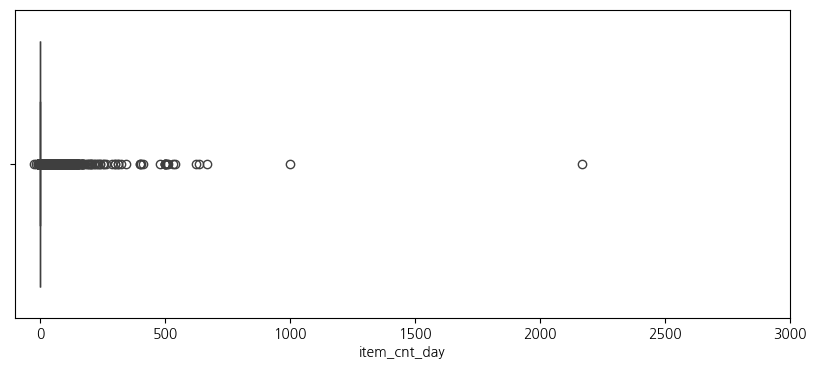

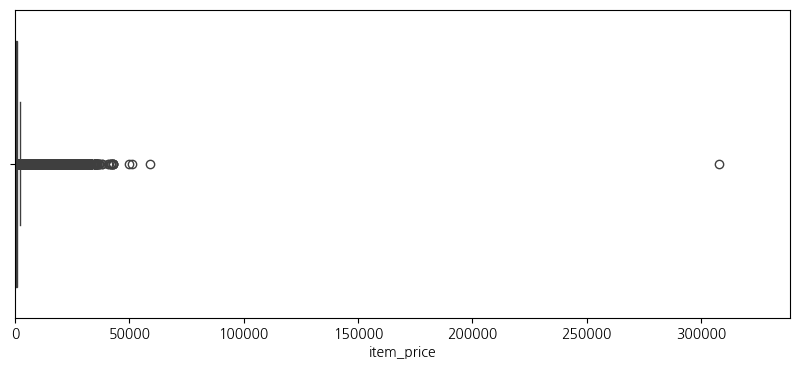

In [ ]:
plt.figure(figsize=(10,4))# 그림크기
plt.xlim(-100,3000)# 범위
sns.boxplot(x=train_df.item_cnt_day)# 독립변수
plt.figure(figsize=(10,4))# 그림크기
plt.xlim(train_df.item_price.min(),train_df.item_price.max()*1.1)
sns.boxplot(x=train_df.item_price)
plt.show()

## **item_cnt_day 이상치**

<Axes: ylabel='item_cnt_day'>

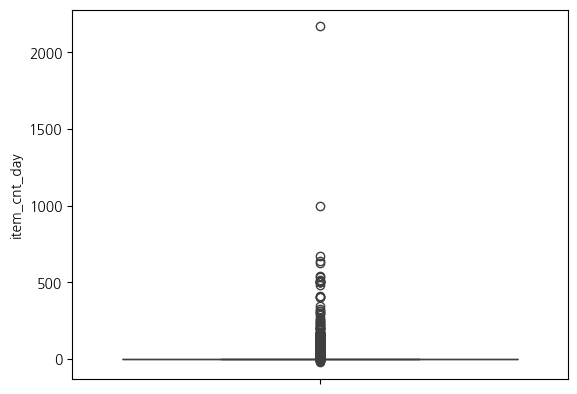

In [ ]:
sns.boxplot(y='item_cnt_day', data=train_df)

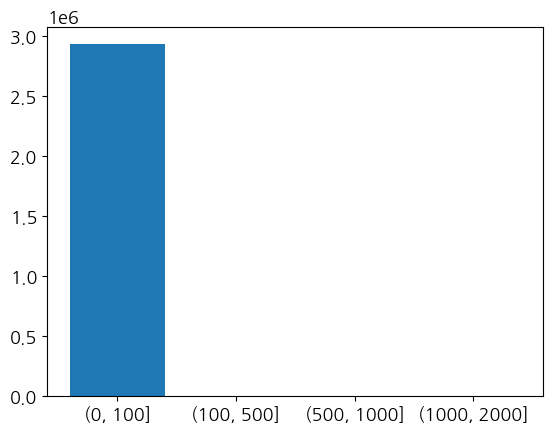

In [ ]:
# 구간별로 나눈 후 시각화
bins = pd.cut(train_df['item_cnt_day'], bins=[0, 100, 500, 1000, 2000])
counts = bins.value_counts()
plt.bar(x=counts.index.astype(str), height=counts.values)
plt.show()

In [ ]:
# 100이상인 값 개수
count_over_100 = (train_df['item_cnt_day'] >= 100).sum()
count_over_100/len(train_df['item_cnt_day'])*100

0.005143316294536946

In [ ]:
train_2=train_df.copy()
train_2=train_2[train_2['item_cnt_day']>100]
train_2

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
566159,11.06.2013,5,12,2808,999.000000,200.0
620237,14.06.2013,5,42,16787,2559.746729,107.0
836296,29.08.2013,7,12,2808,999.000000,150.0
845690,18.09.2013,8,42,3732,2521.211982,217.0
845703,18.09.2013,8,42,3734,2520.730769,104.0
...,...,...,...,...,...,...
2864262,28.09.2015,32,12,9248,1500.000000,139.0
2864264,30.09.2015,32,12,9244,1296.273292,161.0
2909401,14.10.2015,33,12,20949,4.000000,500.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [ ]:
train_2['item_id'].value_counts()

item_id
20949    20
3732     10
3731     10
9242      5
11370     5
10209     5
11373     5
3734      4
10210     4
3730      4
3733      4
19445     4
19437     4
9248      3
9249      3
2808      3
1849      3
8057      3
2814      2
9251      2
11369     2
3025      2
19446     2
9253      2
9245      2
9244      2
9252      2
5917      2
1498      1
7096      1
10212     1
6457      1
11365     1
4392      1
1971      1
7794      1
3931      1
1502      1
6675      1
19436     1
16787     1
16790     1
6111      1
7807      1
2815      1
7798      1
4201      1
Name: count, dtype: int64

In [ ]:
train_2[train_2['item_id']==10209]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2615667,19.05.2015,28,25,10209,1490.891892,148.0
2620219,19.05.2015,28,6,10209,1499.000000,110.0
2625847,19.05.2015,28,12,10209,1499.000000,480.0
2628847,19.05.2015,28,31,10209,1496.435897,117.0
2660666,19.05.2015,28,42,10209,1498.997207,179.0


In [ ]:
train_2[train_2['item_id']==3731]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2555809,14.04.2015,27,31,3731,1946.953216,171.0
2567454,14.04.2015,27,25,3731,1941.995169,207.0
2568846,14.04.2015,27,22,3731,1924.867769,121.0
2571344,14.04.2015,27,26,3731,1936.837838,111.0
2584622,14.04.2015,27,53,3731,1934.922330,103.0
2597018,14.04.2015,27,42,3731,1918.732441,299.0
2599393,14.04.2015,27,6,3731,1933.057971,138.0
2605020,14.04.2015,27,18,3731,1930.034483,145.0
2607551,14.04.2015,27,14,3731,1940.880342,117.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0


In [ ]:
train_2[train_2['item_id']==3732]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
845690,18.09.2013,8,42,3732,2521.211982,217.0
853771,18.09.2013,8,43,3732,2507.273810,168.0
858692,18.09.2013,8,18,3732,2534.000000,156.0
862929,17.09.2013,8,25,3732,2545.135417,264.0
871347,17.09.2013,8,6,3732,2520.486486,148.0
884437,17.09.2013,8,12,3732,2494.754717,106.0
887356,17.09.2013,8,35,3732,2534.784314,102.0
890790,17.09.2013,8,31,3732,2550.597222,288.0
903259,17.09.2013,8,28,3732,2556.633588,131.0
927373,17.09.2013,8,54,3732,2543.701987,151.0


In [ ]:
train_2[train_2['item_id']==20949]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1170070,30.12.2013,11,15,20949,5.000000,194.0
1170072,28.12.2013,11,15,20949,5.000000,255.0
1464033,14.03.2014,14,52,20949,5.000000,121.0
1501160,15.03.2014,14,24,20949,5.000000,405.0
1549966,09.04.2014,15,54,20949,5.000000,300.0
1652814,06.05.2014,16,4,20949,5.000000,104.0
1686924,20.05.2014,16,38,20949,5.000000,164.0
1708207,28.06.2014,17,25,20949,5.000000,501.0
1737941,27.06.2014,17,19,20949,4.029126,103.0
1782715,19.06.2014,17,47,20949,5.000000,251.0


In [ ]:
train_df['item_cnt_day'].mean()

1.242640885140891

<Axes: ylabel='item_cnt_day'>

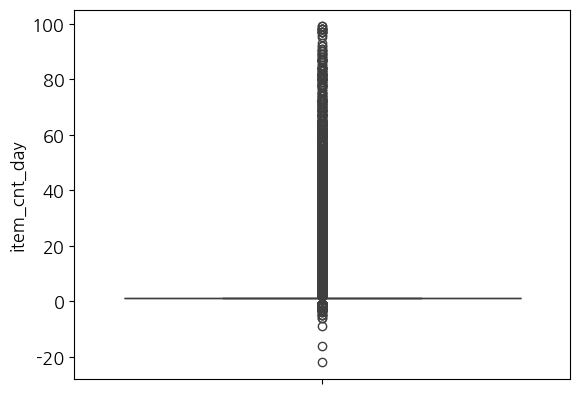

In [ ]:
# 100이상 삭제 후 시각
train_2=train_df.copy()
train_2=train_2[train_2['item_cnt_day']<100]
sns.boxplot(y='item_cnt_day', data=train_2)

In [ ]:
train_2[train_2['item_cnt_day']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id
2,05.01.2013,0,25,2552,899.0,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58
148,23.01.2013,0,25,2321,999.0,-1.0,"Москва ТРК ""Атриум""",Call of Duty: Black Ops II. Расширенное издани...,28
175,07.01.2013,0,25,2199,1449.0,-1.0,"Москва ТРК ""Атриум""",COLDPLAY Mylo Xyloto LP,58
807,02.01.2013,0,25,2330,599.0,-1.0,"Москва ТРК ""Атриум""","Call of Duty: Black Ops [PC, Jewel, русская ве...",30
1041,13.01.2013,0,25,5034,1989.0,-1.0,"Москва ТРК ""Атриум""","NHL 13 [Xbox 360, русская документация]",23
...,...,...,...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0,"Москва ТРК ""Атриум""",IRON MAIDEN The Book Of Souls 2CD,55
2934462,18.10.2015,33,25,4896,6398.0,-1.0,"Москва ТРК ""Атриум""","Mortal Kombat X. Kollector's Edition [PS4, рус...",20
2935263,05.10.2015,33,25,10039,249.0,-1.0,"Москва ТРК ""Атриум""",ВОССТАНИЕ ПЛАНЕТЫ ОБЕЗЬЯН (BD),37
2935643,16.10.2015,33,25,7893,2990.0,-1.0,"Москва ТРК ""Атриум""",X360: Геймпад беспроводной черный - Wireless C...,6


In [ ]:
train_2.iloc[1:3]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id
1,03.01.2013,0,25,2552,899.0,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.0,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58


In [ ]:
# 일일 판매 제품 수량 이상치 제거
train_df = train_df[train_df.item_cnt_day<100]
train_df = train_df[train_df.item_cnt_day>0]

## **item_price 이상치**

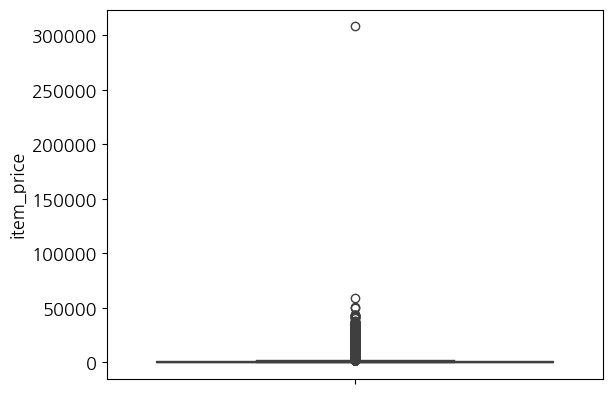

In [ ]:
sns.boxplot(y='item_price', data=train_df);

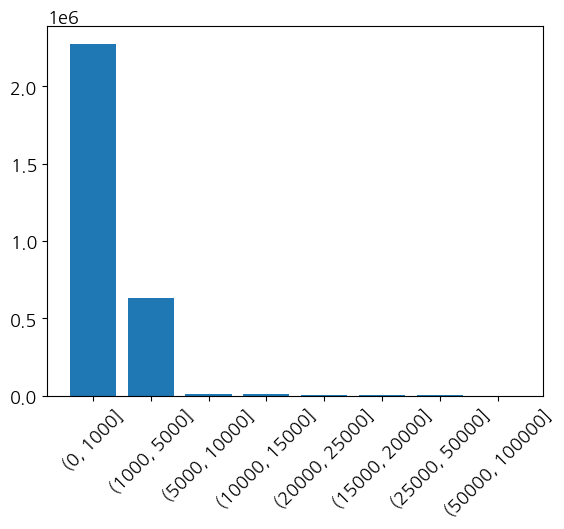

In [ ]:
# 구간별로 나눈 후 시각화
bins = pd.cut(train_df['item_price'], bins=[0, 1000, 5000, 10000, 15000, 20000, 25000, 50000, 100000])
counts = bins.value_counts()
plt.bar(x=counts.index.astype(str), height=counts.values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 5000 이상
count_over_5000 = (train_df['item_price'] > 5000).sum()
count_over_5000/len(train_df['item_price'])*100

1.151617094128892

In [ ]:
# 10000 이상
count_over_10000 = (train_df['item_price'] > 10000).sum()
count_over_10000/len(train_df['item_price'])*100

0.6725487430927841

In [ ]:
# 15000 이상
count_over_15000 = (train_df['item_price'] > 15000).sum()
count_over_15000/len(train_df['item_price'])*100

0.34356394969782317

In [ ]:
# 20000 이상
count_over_20000 = (train_df['item_price'] > 20000).sum()
count_over_20000/len(train_df['item_price'])*100

0.23098424974231

In [ ]:
# 25000 이상
count_over_25000 = (train_df['item_price'] > 25000).sum()
count_over_25000/len(train_df['item_price'])*100

0.08083256520255148

In [ ]:
# 30000 이상
count_over_30000 = (train_df['item_price'] > 30000).sum()
count_over_30000/len(train_df['item_price'])*100

0.008175227833380682

In [ ]:
# 40000 이상
count_over_40000 = (train_df['item_price'] > 40000).sum()
count_over_40000/len(train_df['item_price'])*100

0.00047688829028053975

In [ ]:
# 50000 이상
count_over_50000 = (train_df['item_price'] > 50000).sum()
count_over_50000/len(train_df['item_price'])*100

0.00010219034791725852

In [ ]:
train_2['item_id'].value_counts()

item_id
20949    20
3732     10
3731     10
9242      5
11370     5
10209     5
11373     5
3734      4
10210     4
3730      4
3733      4
19445     4
19437     4
9248      3
9249      3
2808      3
1849      3
8057      3
2814      2
9251      2
11369     2
3025      2
19446     2
9253      2
9245      2
9244      2
9252      2
5917      2
1498      1
7096      1
10212     1
6457      1
11365     1
4392      1
1971      1
7794      1
3931      1
1502      1
6675      1
19436     1
16787     1
16790     1
6111      1
7807      1
2815      1
7798      1
4201      1
Name: count, dtype: int64

In [ ]:
train_2[train_2['item_id']==13449]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [ ]:
# 제품 판매 가격 이상치 제거
train_df = train_df[train_df.item_price<5000]

In [ ]:
# 제품 판매 가격 이상치 제거
train_df = train_df[train_df.item_price<10000]

# **2차 EDA**

In [ ]:
test_shop_ids = test_df['shop_id'].unique()
test_item_ids = test_df['item_id'].unique()
# Only shops that exist in test set.
lk_train = train_df[train_df['shop_id'].isin(test_shop_ids)]
# Only items that exist in test set.
lk_train = lk_train[lk_train['item_id'].isin(test_item_ids)]

In [ ]:
# Select only useful features.
train_monthly = lk_train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]

In [ ]:
# Group by month in this case "date_block_num" and aggregate features.
train_monthly = train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)
train_monthly = train_monthly.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})
# Rename features.
train_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions']

In [ ]:
# Build a data set with all the possible combinations of ['date_block_num','shop_id','item_id'] so we won't have missing records.
shop_ids = train_monthly['shop_id'].unique()
item_ids = train_monthly['item_id'].unique()
empty_df = []
for i in range(34):
    for shop in shop_ids:
        for item in item_ids:
            empty_df.append([i, shop, item])

empty_df = pd.DataFrame(empty_df, columns=['date_block_num','shop_id','item_id'])

In [ ]:
# Merge the train set with the complete set (missing records will be filled with 0).
train_monthly = pd.merge(empty_df, train_monthly, on=['date_block_num','shop_id','item_id'], how='left')
train_monthly.fillna(0, inplace=True)

In [ ]:
# Extract time based features.
train_monthly['year'] = train_monthly['date_block_num'].apply(lambda x: ((x//12) + 2013))
train_monthly['month'] = train_monthly['date_block_num'].apply(lambda x: (x % 12))

In [ ]:
# Grouping data for EDA.
gp_month_mean = train_monthly.groupby(['month'], as_index=False)['item_cnt'].mean()
gp_month_sum = train_monthly.groupby(['month'], as_index=False)['item_cnt'].sum()
gp_category_mean = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].mean()
gp_category_sum = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].sum()
gp_shop_mean = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].mean()
gp_shop_sum = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].sum()

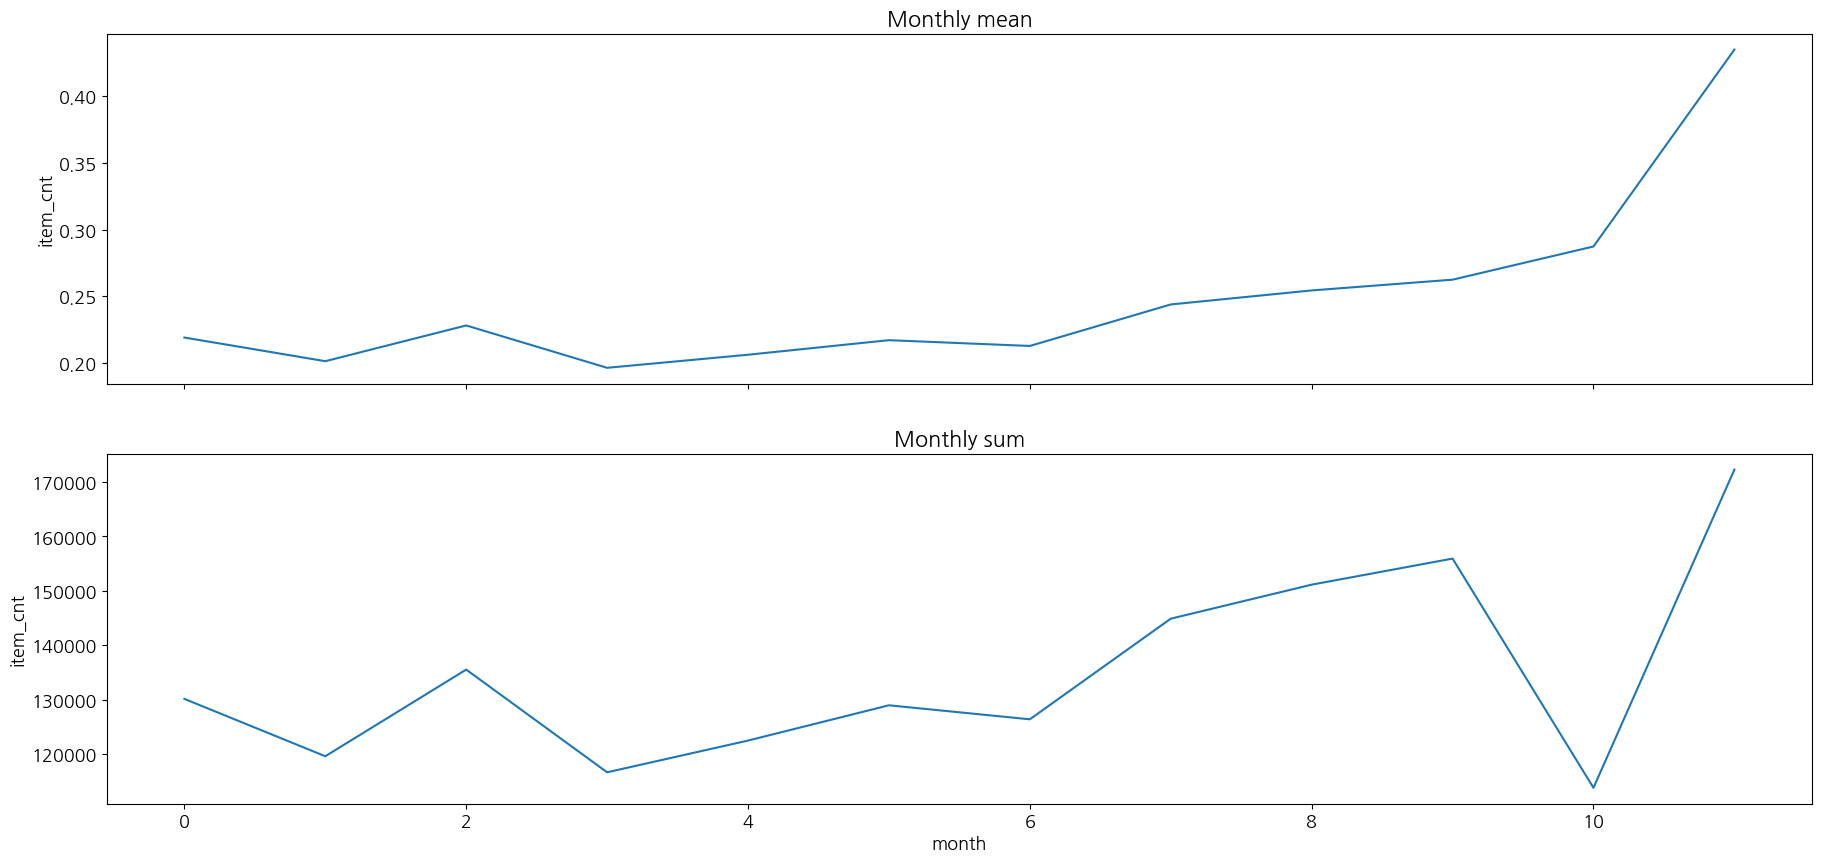

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="month", y="item_cnt", data=gp_month_mean, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="item_cnt", data=gp_month_sum, ax=axes[1]).set_title("Monthly sum")
plt.show()

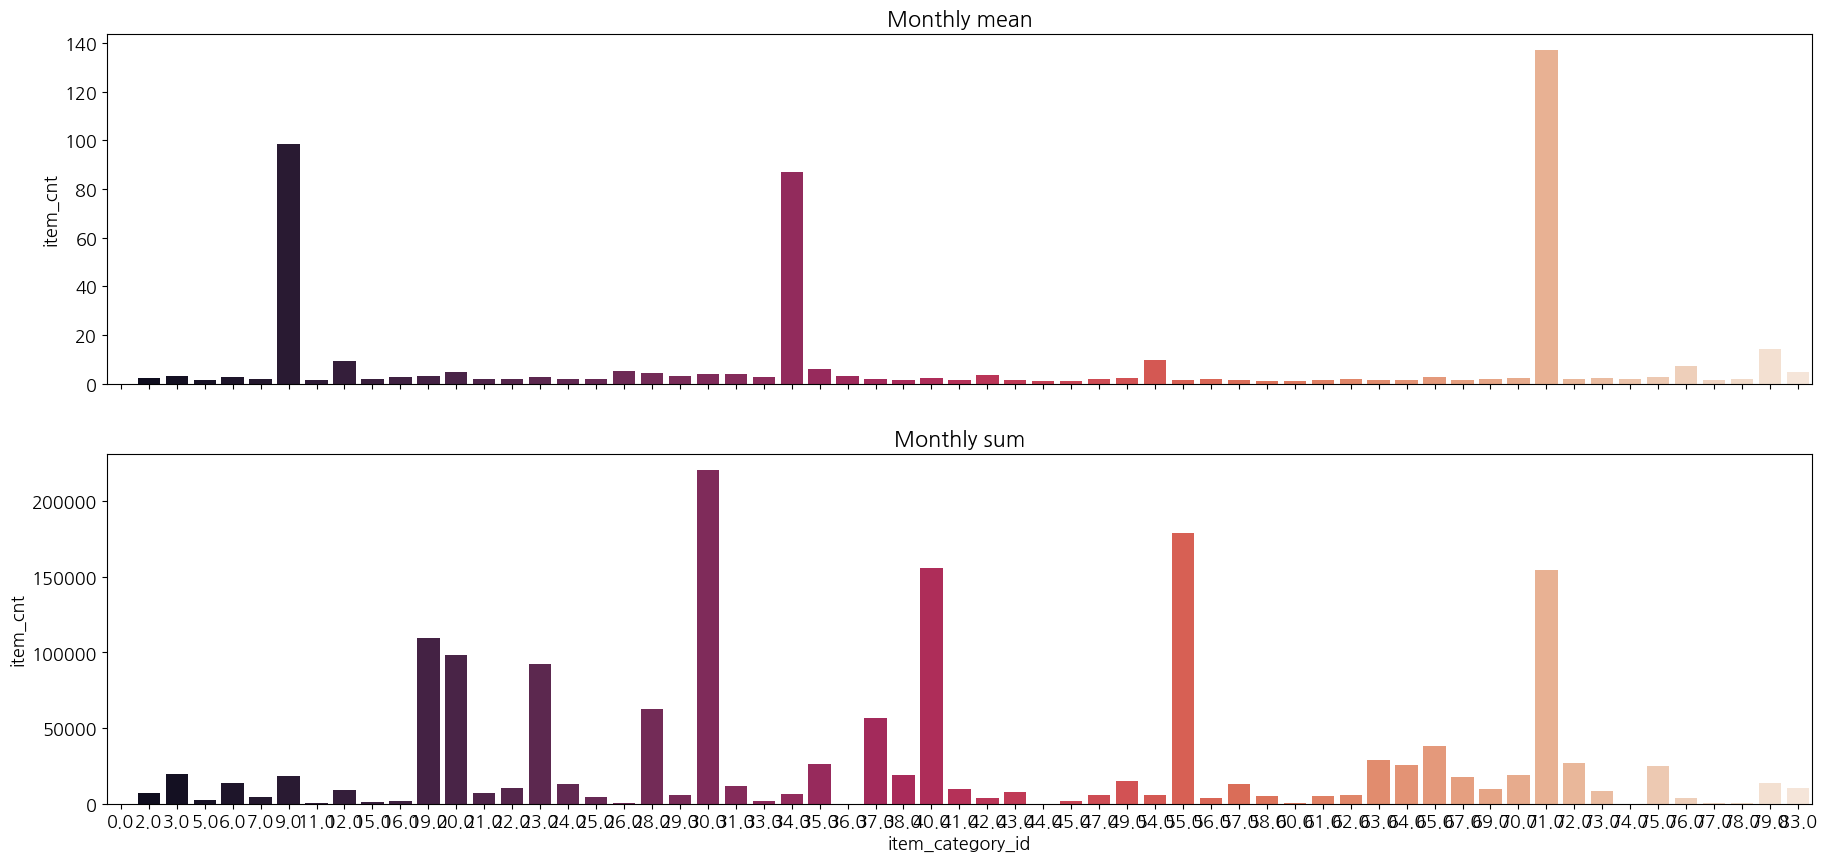

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="item_category_id", y="item_cnt", data=gp_category_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="item_category_id", y="item_cnt", data=gp_category_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()

# 1. 월별 평균 아이템 수량
# 2. 월별 총 아이쳄 수량

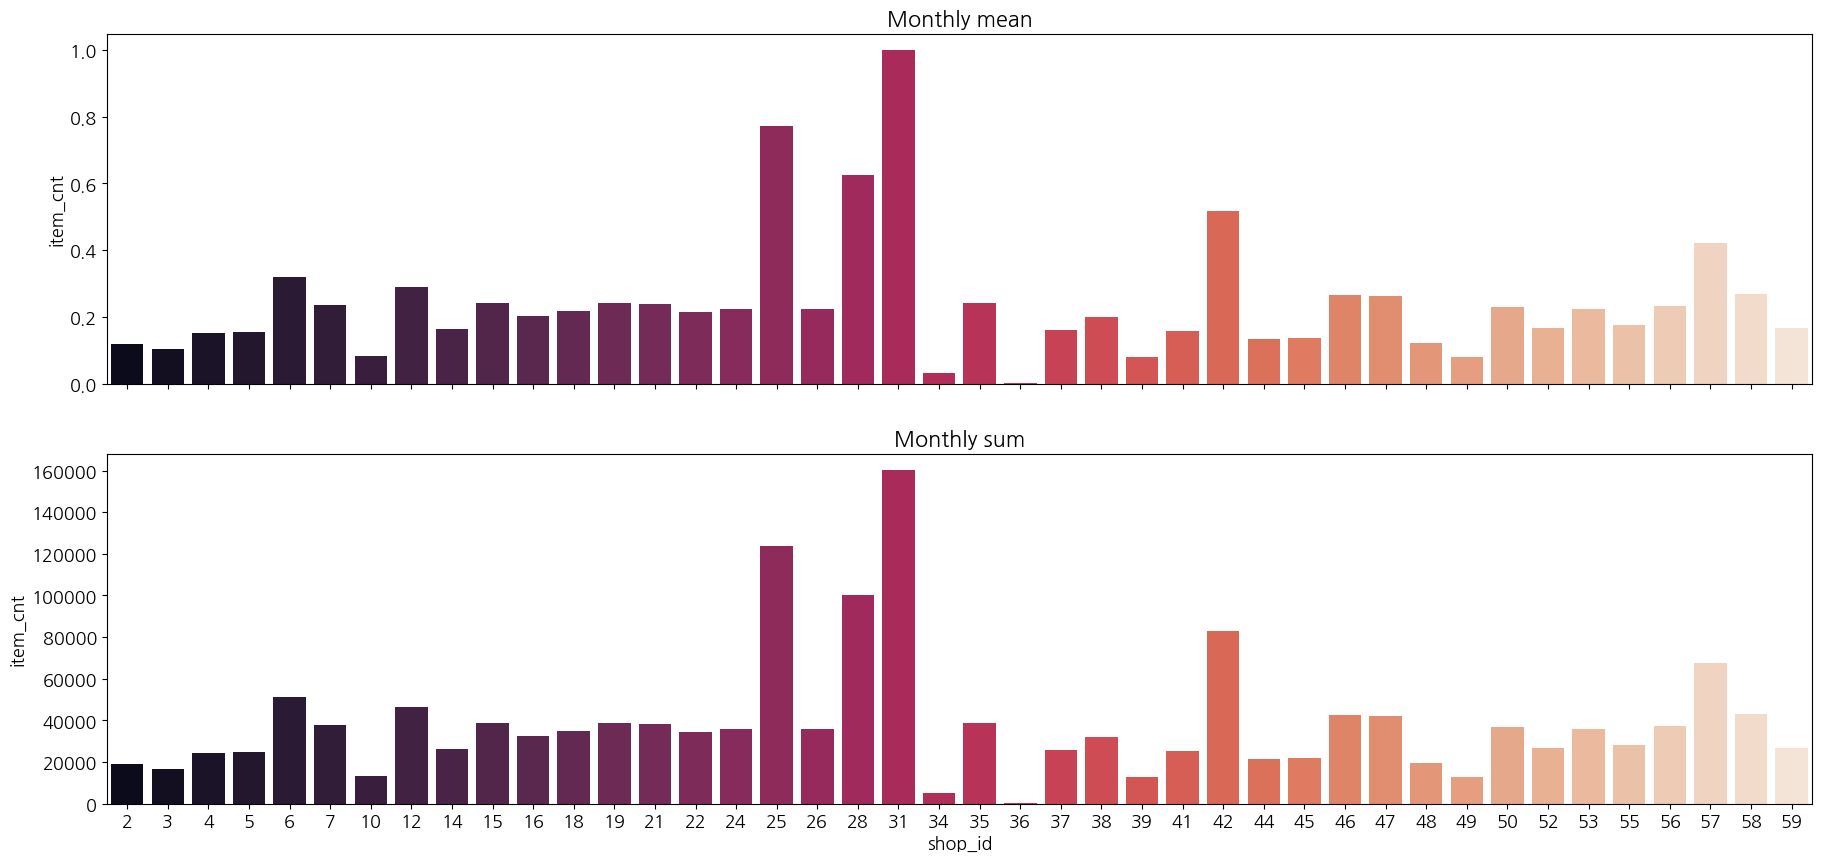

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="shop_id", y="item_cnt", data=gp_shop_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="shop_id", y="item_cnt", data=gp_shop_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()

# 1. 월별 평균 아이템 수량
# 2. 월별 총 아이템 수

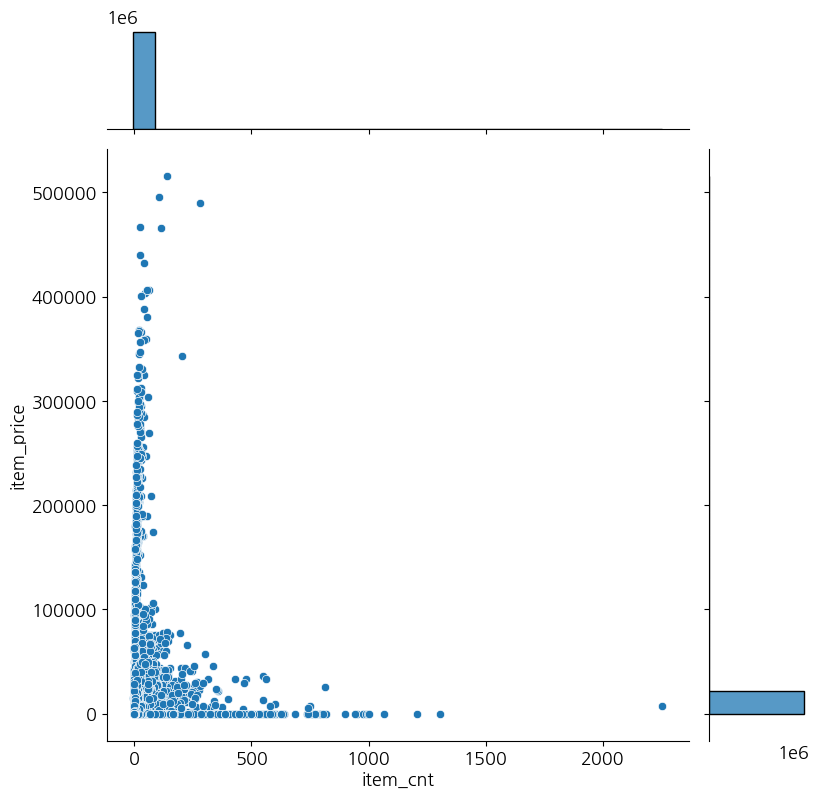

In [ ]:
sns.jointplot(x="item_cnt", y="item_price", data=train_monthly, height=8)
plt.show()
# item_cnt와 item_price 변수 간의 관계를 시각화하는 조인트 플롯(joint plot)
# 조인트 플롯 : 산점도와 히스토그램을 결합한 형태
# 중앙의 산점도: 각 점은 item_cnt와 item_price의 값 쌍
# 위쪽의 히스토그램: item_cnt 변수의 분포
# 오른쪽의 히스토그램: item_price 변수의 분포

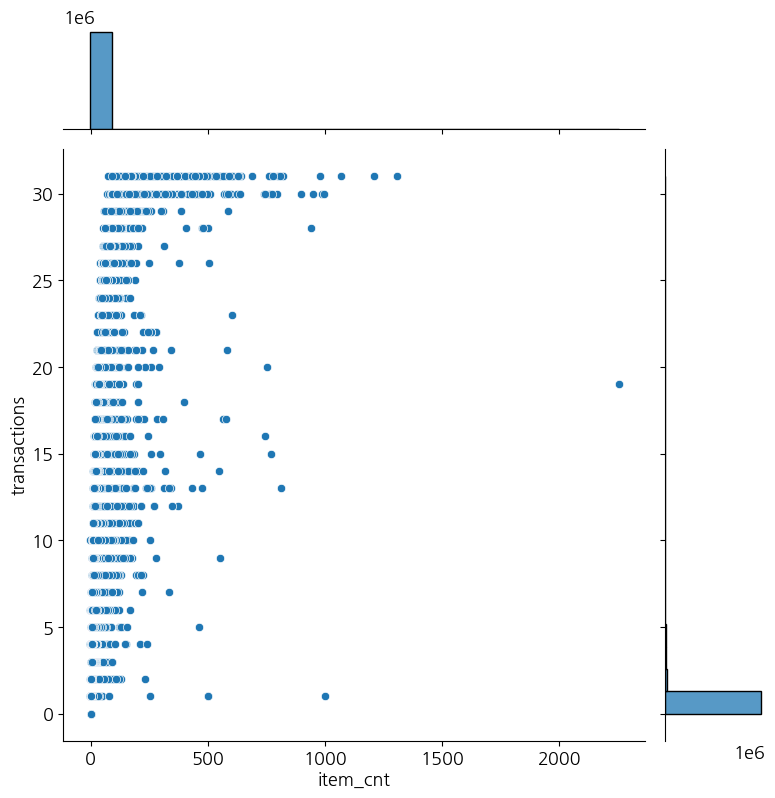

In [ ]:
sns.jointplot(x="item_cnt", y="transactions", data=train_monthly, height=8)
plt.show()

# 'item_cnt와 transactions 변수 간의 관계를 시각화하는 조인트 플롯(joint plot)
# 중앙의 산점도(Scatter Plot): 각 점은 item_cnt와 transactions의 값 쌍
# 위쪽의 히스토그램(Histogram): item_cnt 변수의 분포
# 오른쪽의 히스토그램: transactions 변수의 분포

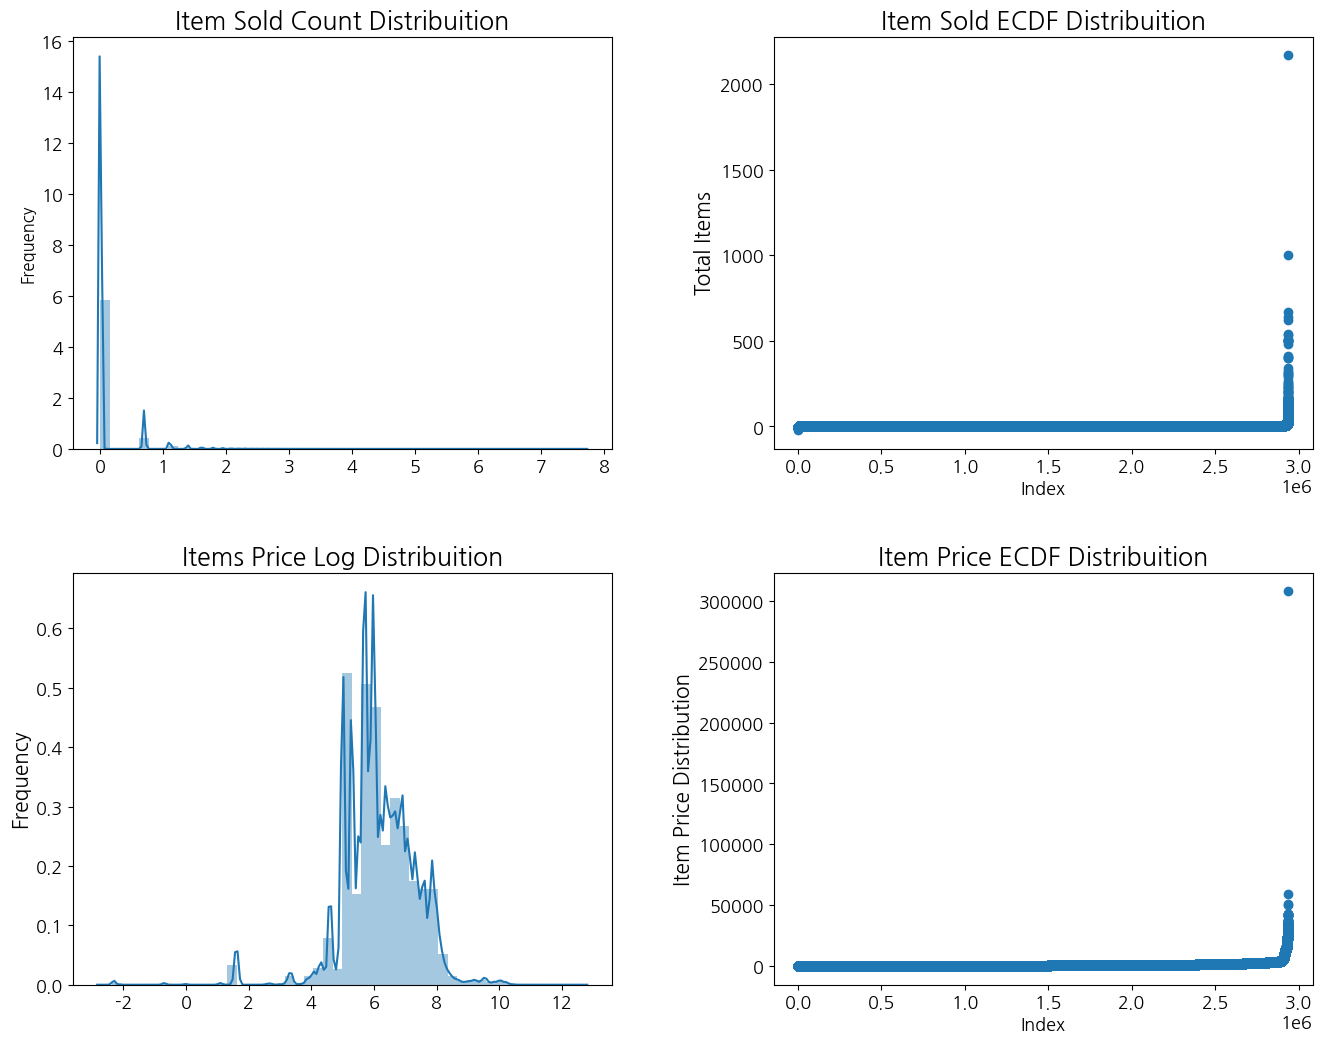

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(221)
g = sns.distplot(np.log(train_df[train_df['item_cnt_day'] >0]['item_cnt_day']))
g.set_title("Item Sold Count Distribuition", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Frequency", fontsize=12)
# 'item_cnt_day'의 로그 분포

plt.subplot(222)
g1 = plt.scatter(range(train_df.shape[0]), np.sort(train_df.item_cnt_day.values))
g1= plt.title("Item Sold ECDF Distribuition", fontsize=18)
g1 = plt.xlabel("Index")
g1 = plt.ylabel("Total Items", fontsize=15)
# 'item_cnt_day'의 ECDF(경험적 누적 분포 함수 : 데이터 샘플의 누적 분포를 나타내는 함수)

plt.subplot(223)
g2 = sns.distplot(np.log(train_df[train_df['item_price'] > 0]['item_price']))
g2.set_title("Items Price Log Distribuition", fontsize=18)
g2.set_xlabel("")
g2.set_ylabel("Frequency", fontsize=15)
# 'item_price'의 로그 분포

plt.subplot(224)
g3 = plt.scatter(range(train_df.shape[0]), np.sort(train_df.item_price.values))
g3= plt.title("Item Price ECDF Distribuition", fontsize=18)
g3 = plt.xlabel("Index")
g3 = plt.ylabel("Item Price Distribution", fontsize=15)
# 'item_price'의 ECDF

plt.subplots_adjust(wspace = 0.3, hspace = 0.3,
                    top = 0.9)

plt.show()

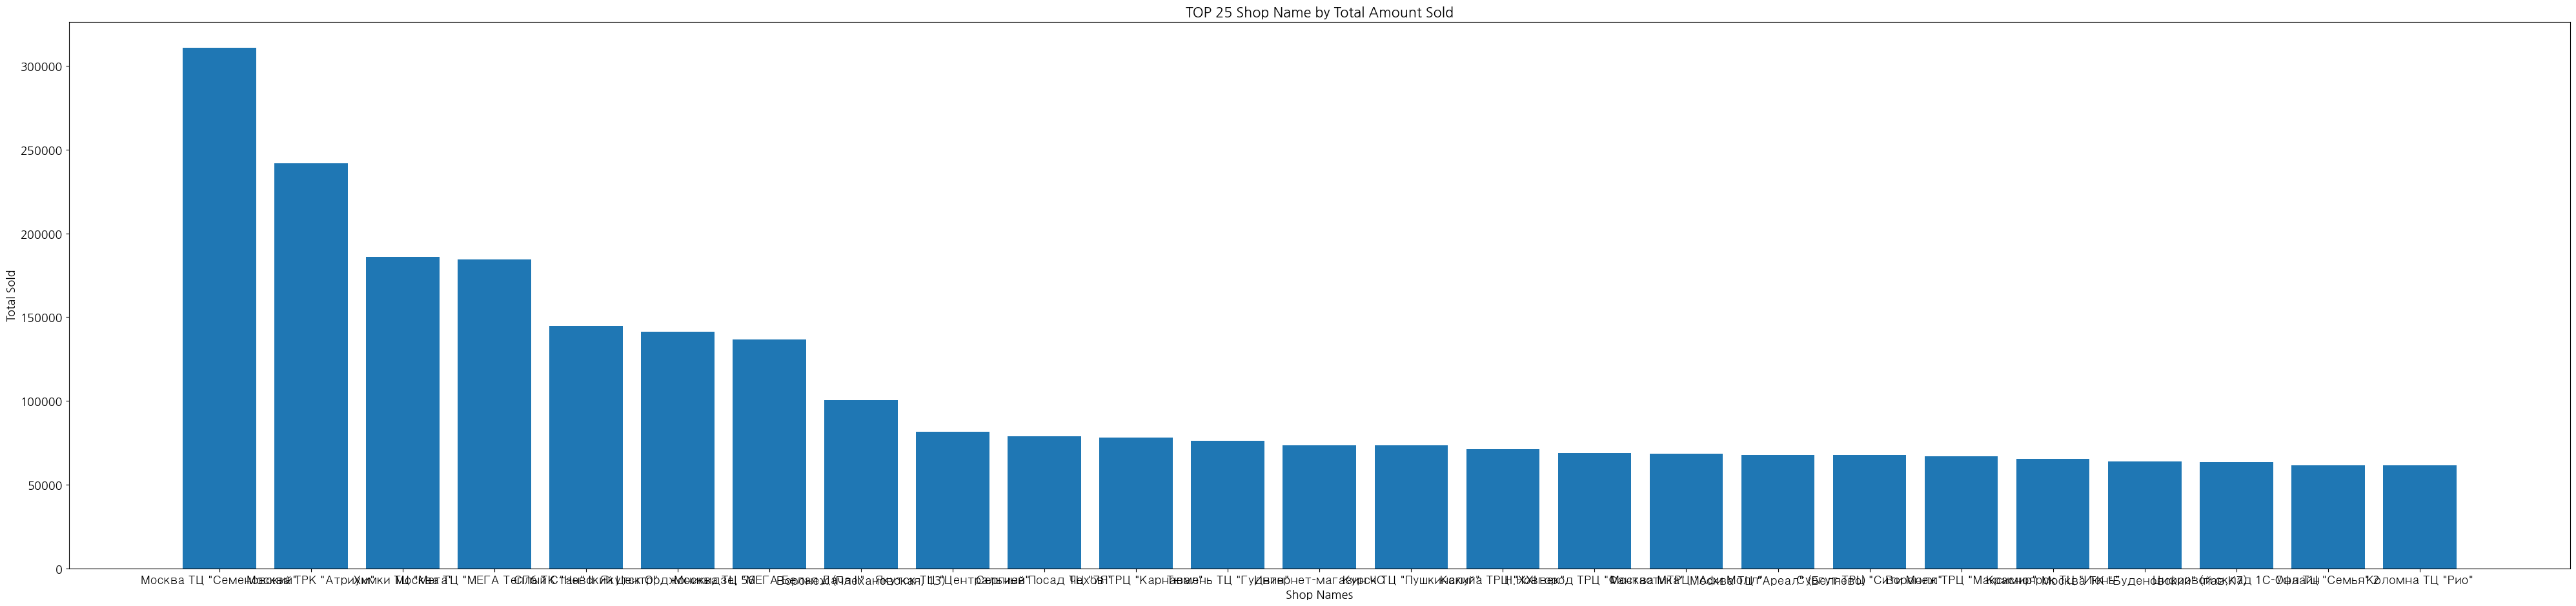

In [ ]:
import matplotlib.pyplot as plt

# Get the data
data = train_df.groupby('shop_name')['item_cnt_day'].sum().nlargest(25)

# Create the bar chart
plt.figure(figsize=(50, 11))
plt.bar(data.index, data.values)
plt.xlabel('Shop Names')
plt.ylabel('Total Sold')
plt.title('TOP 25 Shop Name by Total Amount Sold')
plt.show()

# 상점 별 판매 품목
# 상점 이름별로 그룹화하고, 해당 상점에서 판매된 아이템 수를 합산하여 상위 25개의 상점을 바 차트로 시각화

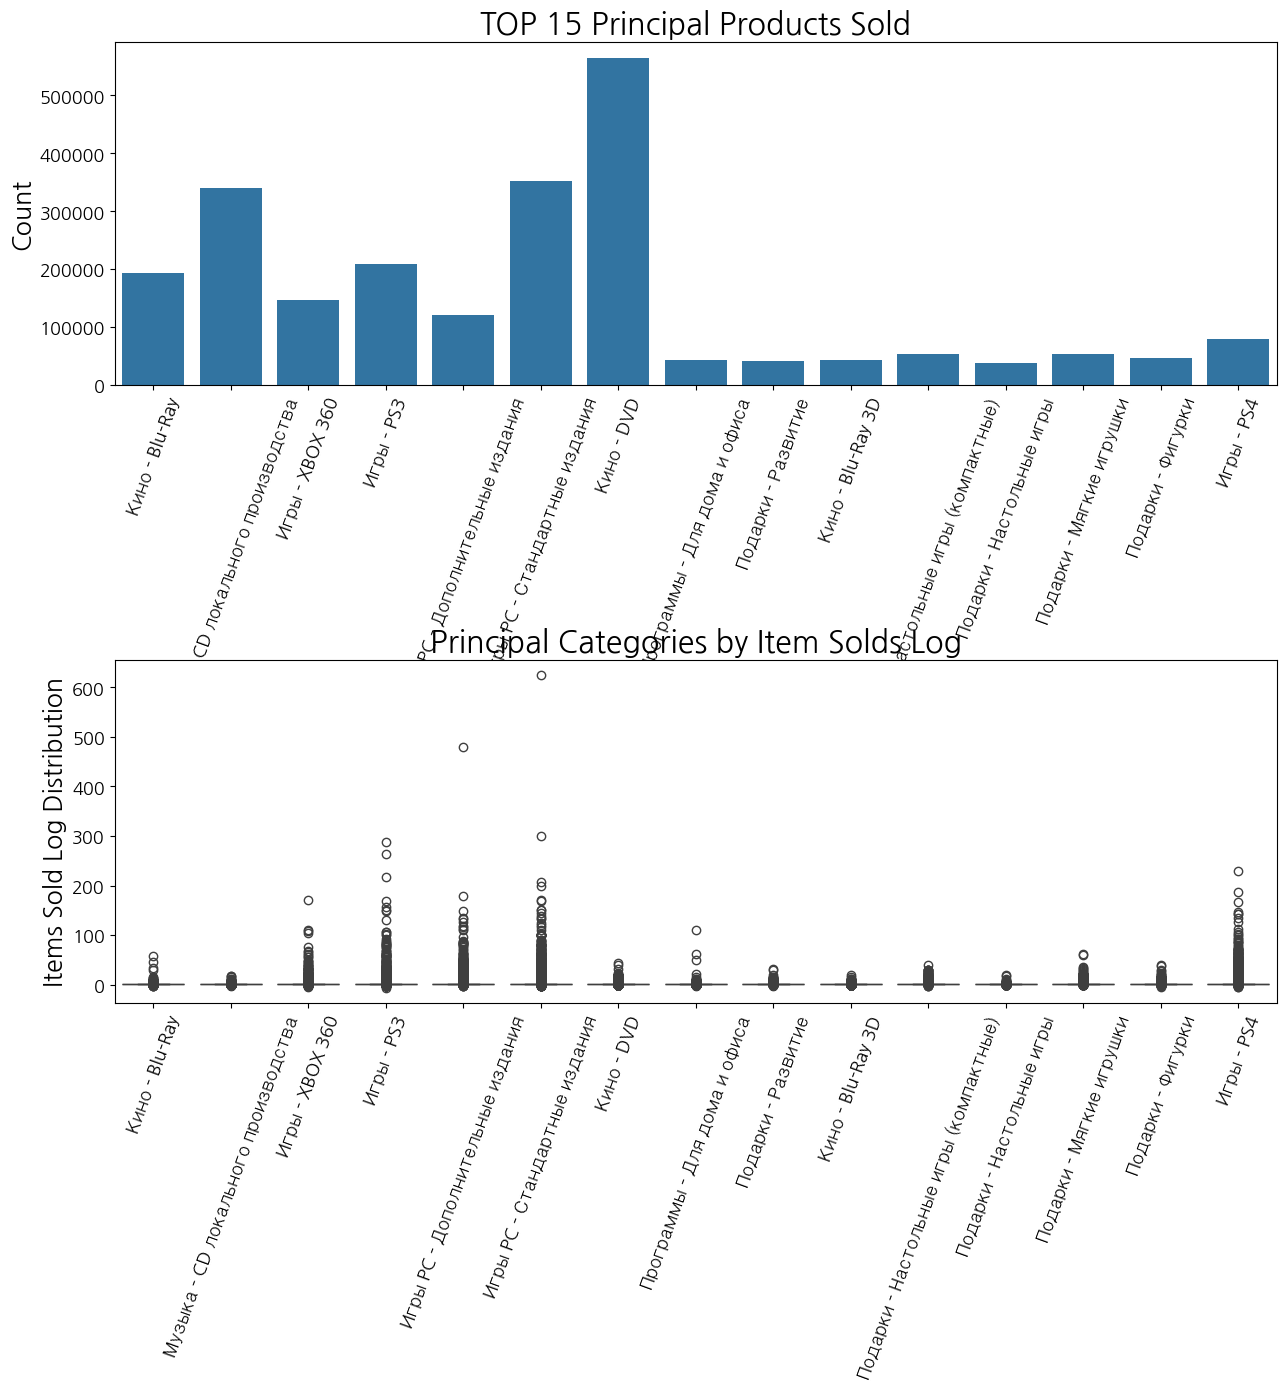

In [ ]:
top_cats = train_df.item_category_name.value_counts()[:15]

plt.figure(figsize=(15,20))

plt.subplot(311)
g1 = sns.countplot(x='item_category_name',
                   data=train_df[train_df.item_category_name.isin(top_cats.index)])
g1.set_xticklabels(g1.get_xticklabels(),rotation=70)
g1.set_title("TOP 15 Principal Products Sold", fontsize=22)
g1.set_xlabel("")
g1.set_ylabel("Count", fontsize=18)
# 아이템 카테고리 별 판매 아이템 수의 상자 그림

plt.subplot(312)
g2 = sns.boxplot(x='item_category_name', y='item_cnt_day',
                   data=train_df[train_df.item_category_name.isin(top_cats.index)])
g2.set_xticklabels(g2.get_xticklabels(),rotation=70)
g2.set_title("Principal Categories by Item Solds Log", fontsize=22)
g2.set_xlabel("")
g2.set_ylabel("Items Sold Log Distribution", fontsize=18)
# 아이템 카테고리 별 판매 아이템 수의 로그 스케일 상자 그림

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)
plt.show()

# **파생변수**

In [ ]:
# 각 상점 이름에서 위치를 추출하여 새로운 'location' 열을 만들고, 'location' 열의 값을 수정
def location(string):
    return string.split()[0]  # 각 상점 이름의 첫 번째 단어가 위치임!

# 'shop_name' 열에서 위치 추출하여 'location' 열 생성
shops["location"] = shops["shop_name"].map(location)

# 'location' 값 중 '!Якутск'을 'Якутск'로 수정
shops["location"].replace({"!Якутск":"Якутск"}, inplace=True)

shops["location"].unique()

array(['Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Ярославль'], dtype=object)

In [ ]:
shops

,shop_name,shop_id,location
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
9,Выездная Торговля,9,Выездная


In [ ]:
shops['location'].value_counts()

location
Москва              13
Якутск               4
РостовНаДону         3
Воронеж              3
Тюмень               3
Новосибирск          2
Н.Новгород           2
Самара               2
Красноярск           2
Казань               2
Жуковский            2
Уфа                  2
СПб                  2
Томск                1
Сургут               1
Сергиев              1
Химки                1
Цифровой             1
Чехов                1
Мытищи               1
Омск                 1
Адыгея               1
Курск                1
Коломна              1
Калуга               1
Интернет-магазин     1
Выездная             1
Вологда              1
Волжский             1
Балашиха             1
Ярославль            1
Name: count, dtype: int64

[Text(0.5, 1.0, 'Sales volume by item category'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

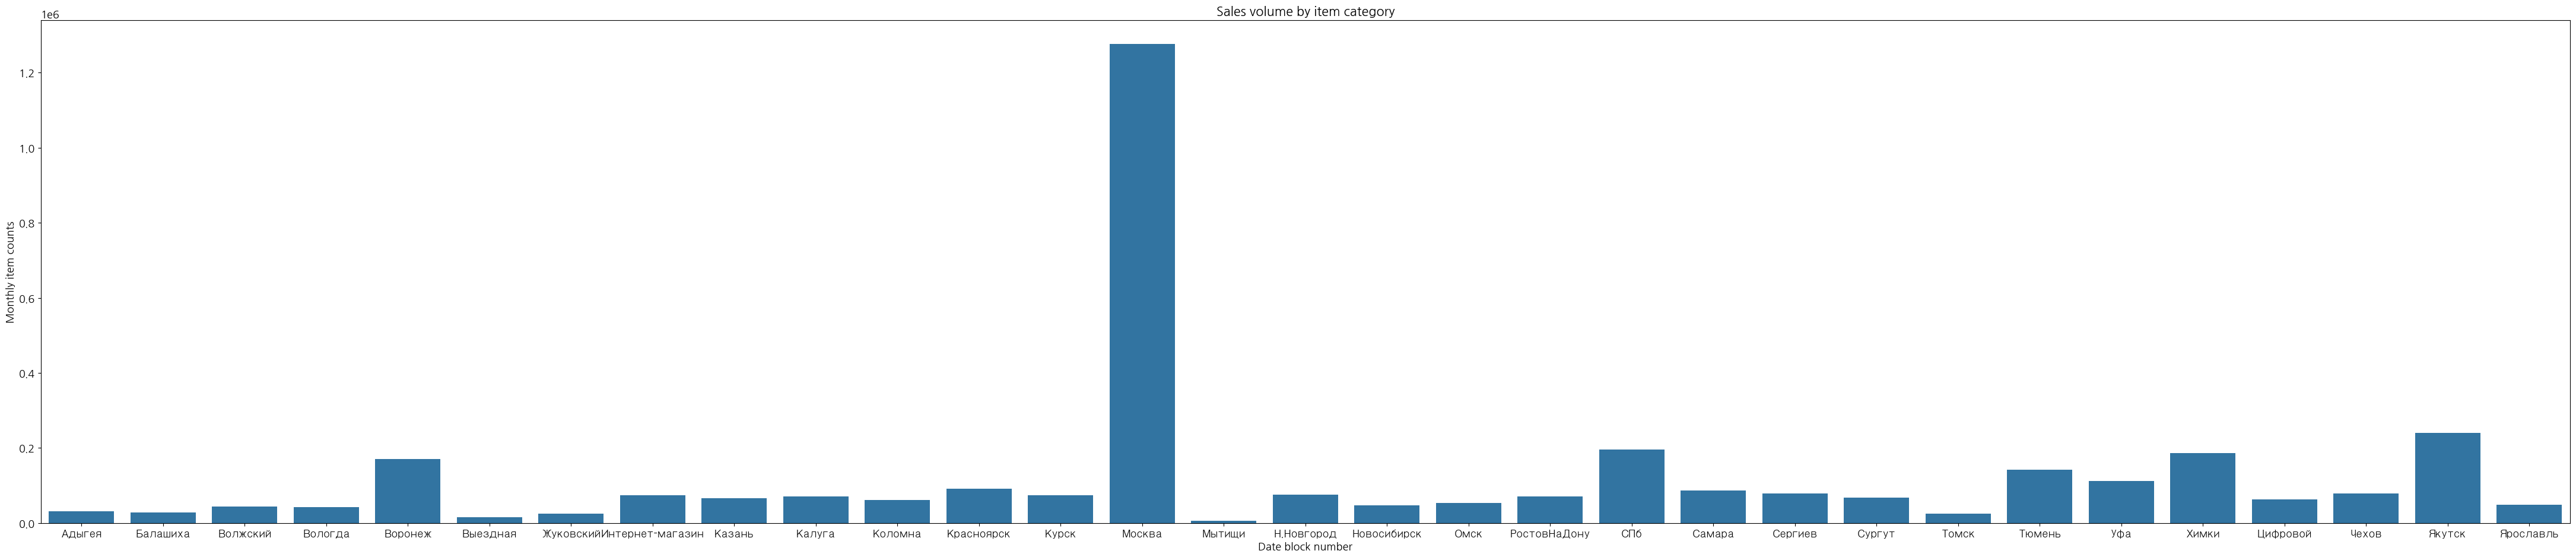

In [ ]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(55, 11)

#상점 지역별 판매량
group_month_sum = train_df.groupby('location').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

#그래프 그리기
sns.barplot(x='location', y='item_cnt_day', data=group_month_sum)

#그래프 제목, x축 라벨, y축 라벨
ax.set(title='Sales volume by item category',
      xlabel='Date block number',
      ylabel='Monthly item counts')

In [ ]:
item_categories['item_category'] = item_categories['item_category_name'].str.split(' ').str[0]
item_categories

,item_category_name,item_category_id,item_category
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
...,...,...,...
79,Служебные,79,Служебные
80,Служебные - Билеты,80,Служебные
81,Чистые носители (шпиль),81,Чистые
82,Чистые носители (штучные),82,Чистые


In [ ]:
item_categories['item_category'].value_counts()

item_name
Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Музыка         6
Программы      6
Карты          5
Кино           5
Служебные      2
Чистые         2
PC             1
Билеты         1
Доставка       1
Элементы       1
Name: count, dtype: int64

[Text(0.5, 1.0, 'Sales volume by item category'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

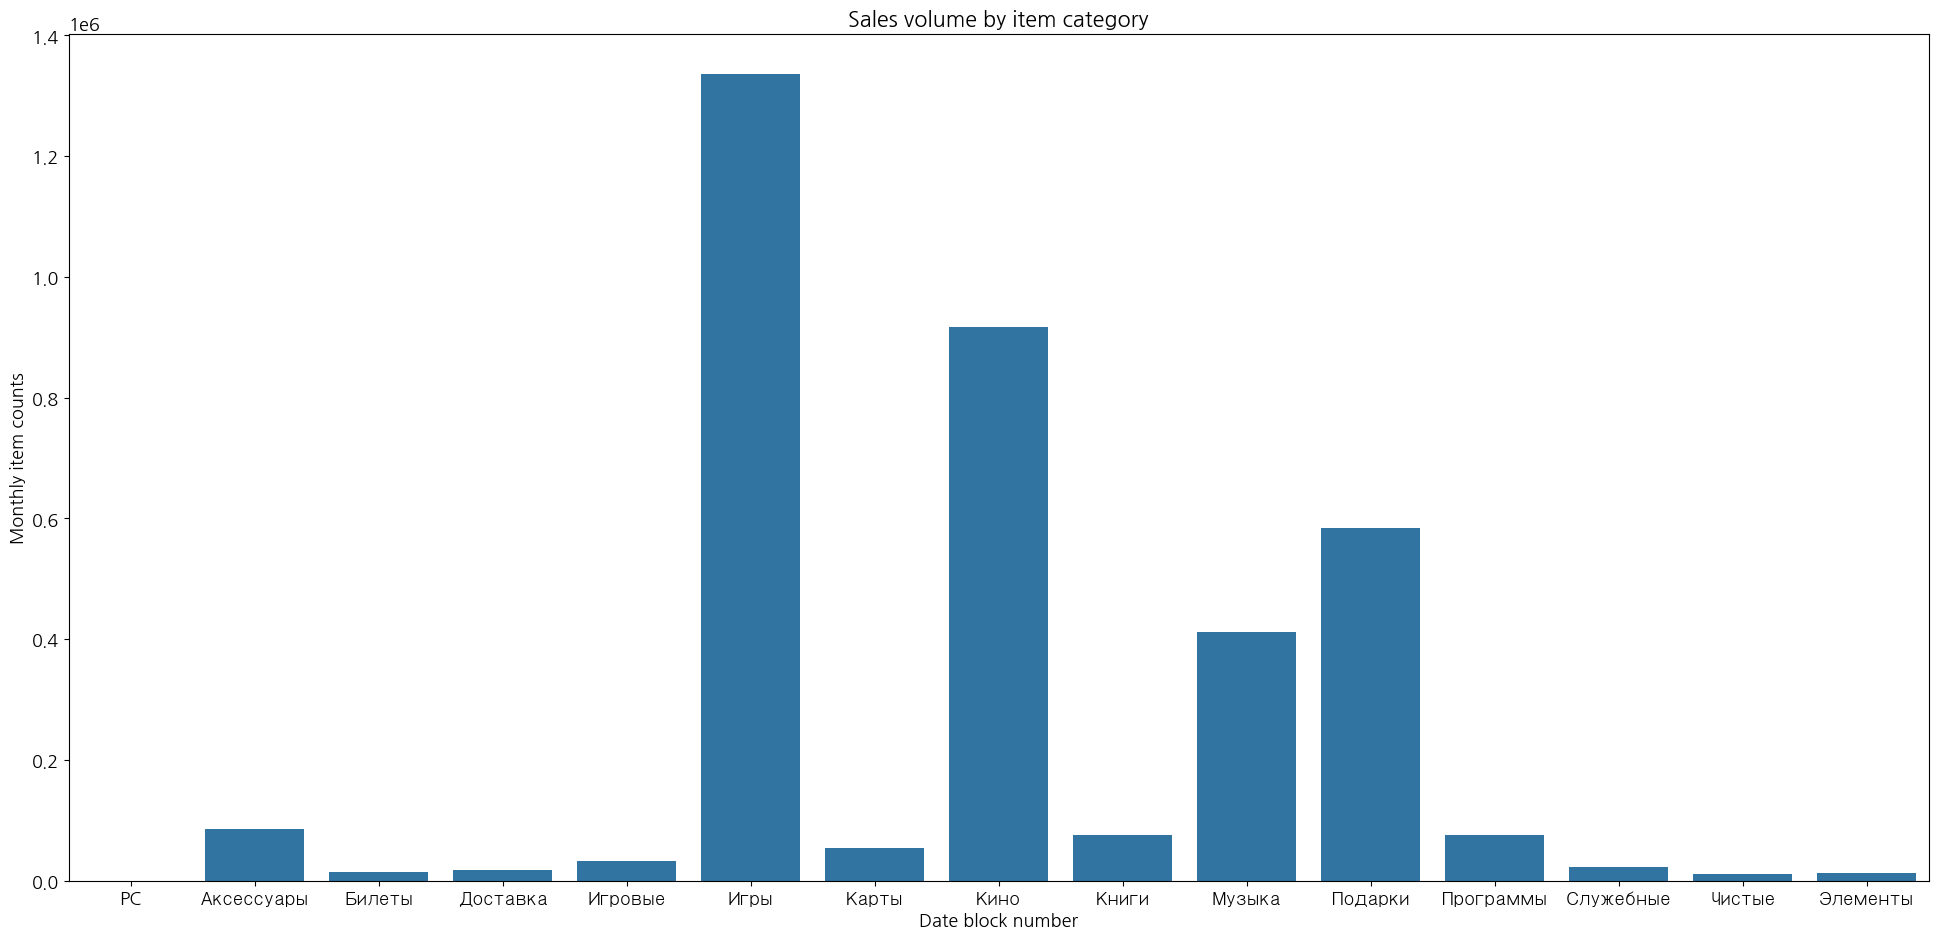

In [ ]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(24, 11)

#상품 카테고리별 판매량
group_month_sum = train_df.groupby('item_category').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

#그래프 그리기
sns.barplot(x='item_category', y='item_cnt_day', data=group_month_sum)

#그래프 제목, x축 라벨, y축 라벨
ax.set(title='Sales volume by item category',
      xlabel='Date block number',
      ylabel='Monthly item counts')

In [ ]:
train_df = train_df.merge(shops, on='shop_id', how='left')
train_df = train_df.merge(items, on='item_id', how='left')
train_df = train_df.merge(item_categories, on='item_category_id', how='left')

In [ ]:
train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,location,item_name_x,item_category_id,item_category_name,item_name_y
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",Ярославль,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",Москва,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",Москва,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",Москва,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Музыка
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",Москва,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Музыка
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум""",Москва,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,Музыка
2935845,09.10.2015,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум""",Москва,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,Музыка
2935846,14.10.2015,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум""",Москва,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,Музыка
2935847,22.10.2015,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум""",Москва,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,Музыка


In [ ]:
train_df[["date_block_num"]] = train_df[["date_block_num"]].astype(int)

In [ ]:
# 월별, 품목별, 상점별 데이터 그룹화
data = train_df.groupby(['date_block_num','item_id' ,'shop_id']).sum().reset_index()
# train_df와 data병합
train_df = pd.merge(train_df, data, on = ['item_id', 'shop_id'], how = 'left')
# NaN값 0으로 채우기
train_df.fillna(0,inplace = True)

In [ ]:
train_df.head()

,date_block_num_x,item_cnt_month_x,item_price_x,date_block_num_y,item_cnt_month_y,item_price_y
0,0,6.0,221.0,0,6.0,221.0
1,0,6.0,221.0,1,10.0,221.0
2,0,3.0,347.0,0,3.0,347.0
3,0,3.0,347.0,1,3.0,347.0
4,0,1.0,247.0,0,1.0,247.0


In [ ]:
test_df = test_df.merge(shops, on='shop_id', how='left')
test_df = test_df.merge(items, on='item_id', how='left')
test_df = test_df.merge(item_categories, on='item_category_id', how='left')

In [ ]:
test_df

,ID,shop_id,item_id,shop_name,location,item_name,item_category_id,item_category_name,item_category
0,0,5,5037,"Вологда ТРЦ ""Мармелад""",Вологда,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Игры
1,1,5,5320,"Вологда ТРЦ ""Мармелад""",Вологда,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,Музыка
2,2,5,5233,"Вологда ТРЦ ""Мармелад""",Вологда,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,Игры
3,3,5,5232,"Вологда ТРЦ ""Мармелад""",Вологда,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,Игры
4,4,5,5268,"Вологда ТРЦ ""Мармелад""",Вологда,"Need for Speed [PS4, русская версия]",20,Игры - PS4,Игры
...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,"Самара ТЦ ""ПаркХаус""",Самара,СБ. Союз 55,55,Музыка - CD локального производства,Музыка
214196,214196,45,16188,"Самара ТЦ ""ПаркХаус""",Самара,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,Подарки
214197,214197,45,15757,"Самара ТЦ ""ПаркХаус""",Самара,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,Музыка
214198,214198,45,19648,"Самара ТЦ ""ПаркХаус""",Самара,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,Кино


In [ ]:
#데이터를 월간 매출 데이터로 변환

# test 데이터와 병합하여 월별 판매 데이터가 있는 데이터셋 생성
test_df = pd.merge(test_df, data, on = ['item_id', 'shop_id'], how = 'left')
# NaN 값을 0으로 채움
test_df.fillna(0,inplace = True)

# date_block_num 열을 정수형으로 변환
test_df[["date_block_num"]] = test_df[["date_block_num"]].astype(int)

test_df

,ID,shop_id,item_id,shop_name,location,item_name_x,item_category_id,item_category_name,item_name_y,date_block_num,item_cnt_month,item_price
0,0,5,5037,"Вологда ТРЦ ""Мармелад""",Вологда,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Игры,20,1.0,2599.0
1,0,5,5037,"Вологда ТРЦ ""Мармелад""",Вологда,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Игры,22,1.0,2599.0
2,0,5,5037,"Вологда ТРЦ ""Мармелад""",Вологда,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Игры,23,2.0,1999.0
3,0,5,5037,"Вологда ТРЦ ""Мармелад""",Вологда,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Игры,24,2.0,1999.0
4,0,5,5037,"Вологда ТРЦ ""Мармелад""",Вологда,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,Игры,28,1.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
702950,214197,45,15757,"Самара ТЦ ""ПаркХаус""",Самара,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,Музыка,25,1.0,199.0
702951,214198,45,19648,"Самара ТЦ ""ПаркХаус""",Самара,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,Кино,0,0.0,0.0
702952,214199,45,969,"Самара ТЦ ""ПаркХаус""",Самара,3 ДНЯ НА УБИЙСТВО (BD),37,Кино - Blu-Ray,Кино,17,3.0,549.0
702953,214199,45,969,"Самара ТЦ ""ПаркХаус""",Самара,3 ДНЯ НА УБИЙСТВО (BD),37,Кино - Blu-Ray,Кино,18,1.0,549.0
